Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=42

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=24 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
244                                           NaN             Timor-Leste   
245                                           NaN                    Togo   
246                                           NaN     Trinidad and Tobago   
247                                           NaN                 Tunisia   
248                                           NaN                  Turkey   
249                                           NaN           United States   
250                                           NaN                  Uganda   
251                                           NaN                 Ukraine   
252                                           NaN    United Arab Emirates   
253                                      Anguilla          United Kingdom   
254                                       Bermuda          United Kingdom   
255                        British Virgin Islands          United Kingdom   
256                                Cayman Islands          United Kingdom   
257                               Channel Islands          United Kingdom   
258                   Falkland Islands (Malvinas)          United Kingdom   
259                                     Gibraltar          United Kingdom   
260                                   Isle of Man          United Kingdom   
261                                    Montserrat          United Kingdom   
262  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
263                      Turks and Caicos Islands          United Kingdom   
264                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN             Timor-Leste   
251                                           NaN                    Togo   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN           United States   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/21  3/31/21  4/1/21  \
185        0        0        0        0  ...      449      449     449   
186        0        0        0        0  ...       10       12      12   
187        0        0        0        0  ...   202633   203210  203664   
188        0        0        0        0  ...        0        0       0   
189        0        0        0        0  ...     4915     4960    5003   
190        0        0        0        0  ...       28       28      28   
191        0        0        0        0  ...        6        8       8   
192        0        0        0        0  ...     1266     1274    1286   
193        0        0        0        0  ...     8813     8818    8825   
194        0        0        0        0  ...      769      775     775   

     4/2/21  4/3/21  4/4/21  4/5/21  4/6/21   Population           region  
185     449     449     449     449     450     4,649,658  Mauritania_nan  
186      12      12      12      12      12           NaN   Mauritius_nan  
187  203854  204011  204147  204399  204985   128,640,794      Mexico_nan  
188       0       0       0       0       0           NaN  Micronesia_nan  
189    5048    5092    5136    5178    5224     4,035,942     Moldova_nan  
190      28      29      29      30      30        39,183      Monaco_nan  
191      10      10      11      13      13     3,278,290    Mongolia_nan  
192    1296    1303    1305    1317    1326       622 500  Montenegro_nan  
193    8835    8842    8850    8857    8865    36,817,128     Morocco_nan  
194     778     782     782     782     785    31,542,919  Mozambique_nan  

[10 rows x 447 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat      Long  \
175                               NaN     Montenegro  42.708678  19.37439   
176                               NaN        Morocco  31.791700  -7.09260   
177                               NaN     Mozambique -18.665700  35.52960   
178                               NaN        Namibia -22.957600  18.49040   
179                               NaN          Nepal  28.166700  84.25000   
180                             Aruba    Netherlands  12.521100 -69.96830   
181  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400 -68.23850   
182                           Curacao    Netherlands  12.169600 -68.99000   
183                      Sint Maarten    Netherlands  18.042500 -63.05480   
184                               NaN    Netherlands  52.132600   5.29130   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/21  \
175        0        0        0        0        0        0  ...    82946   
176        0        0        0        0        0        0  ...   483165   
177        0        0        0        0        0        0  ...    55371   
178        0        0        0        0        0        0  ...    41676   
179        0        0        0        0        0        0  ...   272727   
180        0        0        0        0        0        0  ...     8635   
181        0        0        0        0        0        0  ...      180   
182        0        0        0        0        0        0  ...     5214   
183        0        0        0        0        0        0  ...     2073   
184        0        0        0        0        0        0  ...        0   

     3/31/21  4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21   Population   \
175    83498   84035   84587   85153   85598   86029   86512       622 500   
176   483363  483711  484224  484793  484921  485162  485708    36,817,128   
177    56409   56835   56841   56965   57124   57234   57926    31,542,919   
178    41848   41910   42121   42264   42346   42358   42641     2,540,905   
179   272786  272851  272962  273123  273240  273342  273455    29,300,000   
180     8684    8713    8815    8898    8984    9053    9125       116,600   
181      180     180     180     180     180     180     180           NaN   
182     5267    5330    5368    5401    5488    5525    5579       158,665   
183     2078    2083    2083    2083    2083    2083    2102           NaN   
184        0       0       0       0       0       0       0    17,180,000   

                                           region  
175                                Montenegro_nan  
176                                   Morocco_nan  
177                                Mozambique_nan  
178                                   Namibia_nan  
179                                     Nepal_nan  
180                             Netherlands_Aruba  
181  Netherlands_Bonaire, Sint Eustatius and Saba  
182                           Netherlands_Curacao  
183                      Netherlands_Sint Maarten  
184                               Netherlands_nan  

[10 rows x 447 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/21  3/31/21   4/1/21  \
185        0        0        0        0  ...    17824    17847    17878   
186        0        0        0        0  ...      996     1028     1039   
187        0        0        0        0  ...  2232910  2238887  2244268   
188        0        0        0        0  ...        1        1        1   
189        0        0        0        0  ...   228370   230241   231756   
190        0        0        0        0  ...     2282     2288     2305   
191        0        0        0        0  ...     8447     8841     8841   
192        0        0        0        0  ...    90832    91218    91573   
193        0        0        0        0  ...   495421   496097   496676   
194        0        0        0        0  ...    67292    67579    67729   

      4/2/21   4/3/21   4/4/21   4/5/21   4/6/21   Population           region  
185    17904    17917    17927    17939    17955     4,649,658  Mauritania_nan  
186     1095     1104     1112     1121     1130           NaN   Mauritius_nan  
187  2247357  2249195  2250458  2251705  2256509   128,640,794      Mexico_nan  
188        1        1        1        1        1           NaN  Micronesia_nan  
189   233136   234394   235087   235790   236563     4,035,942     Moldova_nan  
190     2320     2326     2329     2334     2345        39,183      Monaco_nan  
191     9598     9598    10820    11651    11651     3,278,290    Mongolia_nan  
192    91906    92222    92519    92740    93030       622 500  Montenegro_nan  
193   497257   497832   498197   498329   499025    36,817,128     Morocco_nan  
194    67923    68005    68119    68227    68292    31,542,919  Mozambique_nan  

[10 rows x 447 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Rwanda  -1.940300   29.873900   
221            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
222            NaN                       Saint Lucia  13.909400  -60.978900   
223            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
224            NaN                             Samoa -13.759000 -172.104600   
225            NaN                        San Marino  43.942400   12.457800   
226            NaN             Sao Tome and Principe   0.186400    6.613100   
227            NaN                      Saudi Arabia  23.885942   45.079162   
228            NaN                           Senegal  14.497400  -14.452400   
229            NaN                            Serbia  44.016500   21.005900   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/21  \
220        0        0        0        0        0        0  ...    21645   
221        0        0        0        0        0        0  ...       44   
222        0        0        0        0        0        0  ...     4228   
223        0        0        0        0        0        0  ...     1739   
224        0        0        0        0        0        0  ...        3   
225        0        0        0        0        0        0  ...     4678   
226        0        0        0        0        0        0  ...     2221   
227        0        0        0        0        0        0  ...   389422   
228        0        0        0        0        0        0  ...    38618   
229        0        0        0        0        0        0  ...   595489   

     3/31/21  4/1/21  4/2/21  4/3/21  4/4/21  4/5/21  4/6/21   Population   \
220    21783   21918   22167   22243   22482   22684   22862    12,952,218   
221       44      44      44      44      44      44      44           NaN   
222     4238    4245    4265    4273    4273    4273    4297       184,106   
223     1748    1750    1754    1755    1758    1764    1765       110,940   
224        3       3       3       3       3       3       3           NaN   
225     4730    4730    4775    4775    4775    4775    4864        33,916   
226     2223    2232    2236    2240    2240    2244    2248           NaN   
227   390007  390597  391325  392009  392682  393377  394169    34,695,447   
228    38705   38782   38889   38953   39024   39093   39127    16,743,927   
229   600596  605406  610232  614365  617669  621375  625773     8,744,671   

                                   region  
220                            Rwanda_nan  
221             Saint Kitts and Nevis_nan  
222                       Saint Lucia_nan  
223  Saint Vincent and the Grenadines_nan  
224                             Samoa_nan  
225                        San Marino_nan  
226             Sao Tome and Principe_nan  
227                      Saudi Arabia_nan  
228                           Senegal_nan  
229                            Serbia_nan  

[10 rows x 447 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

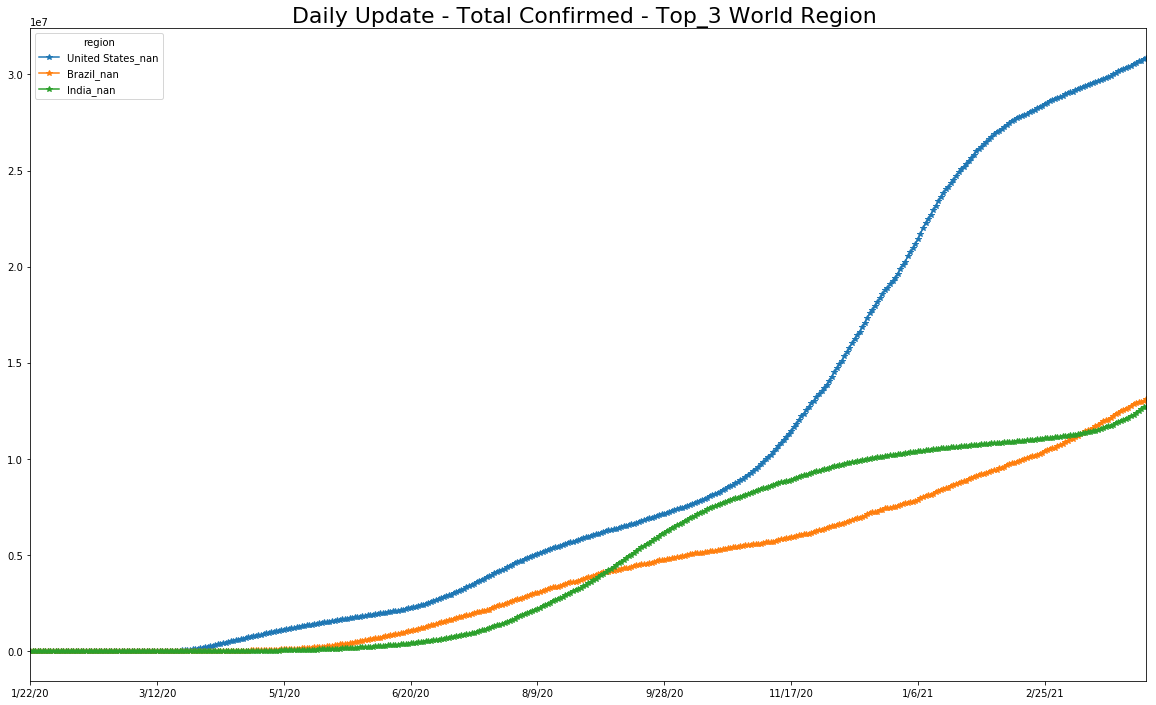

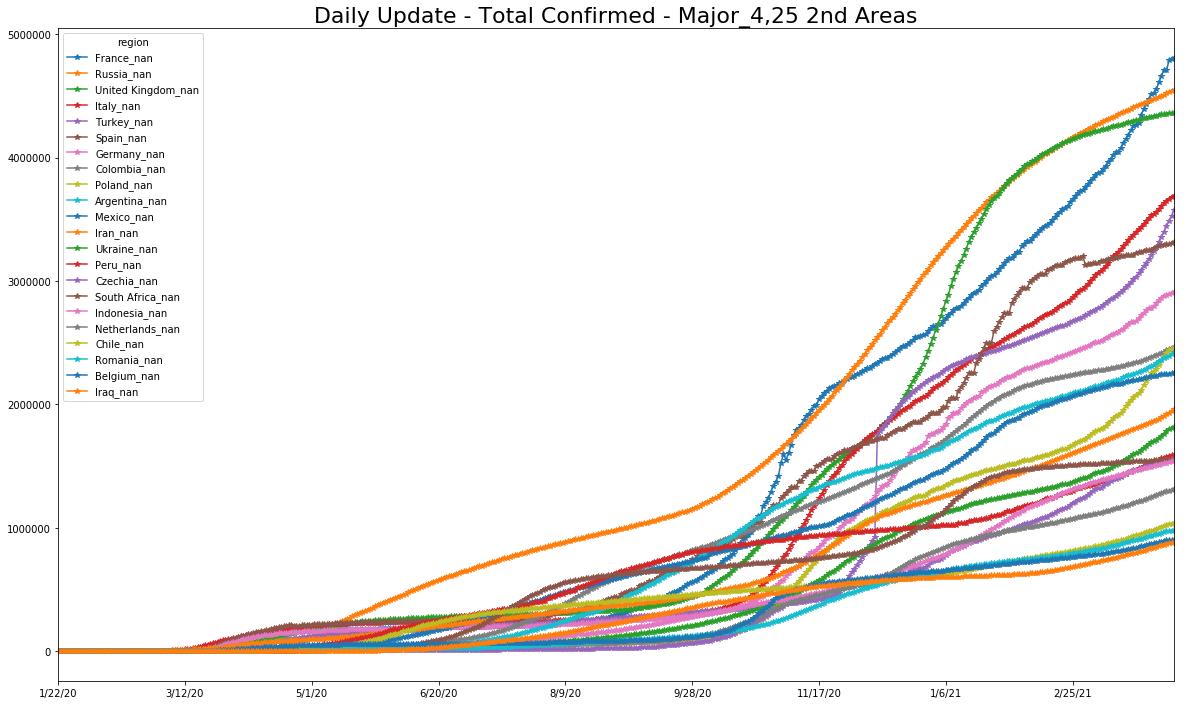

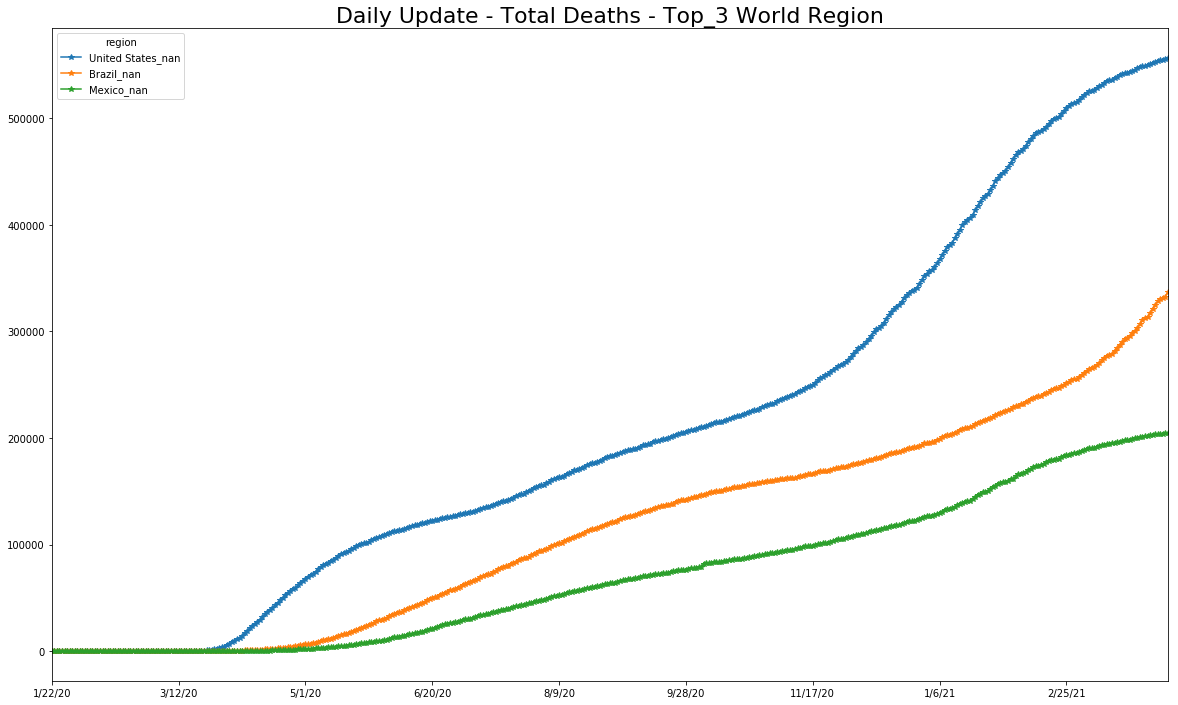

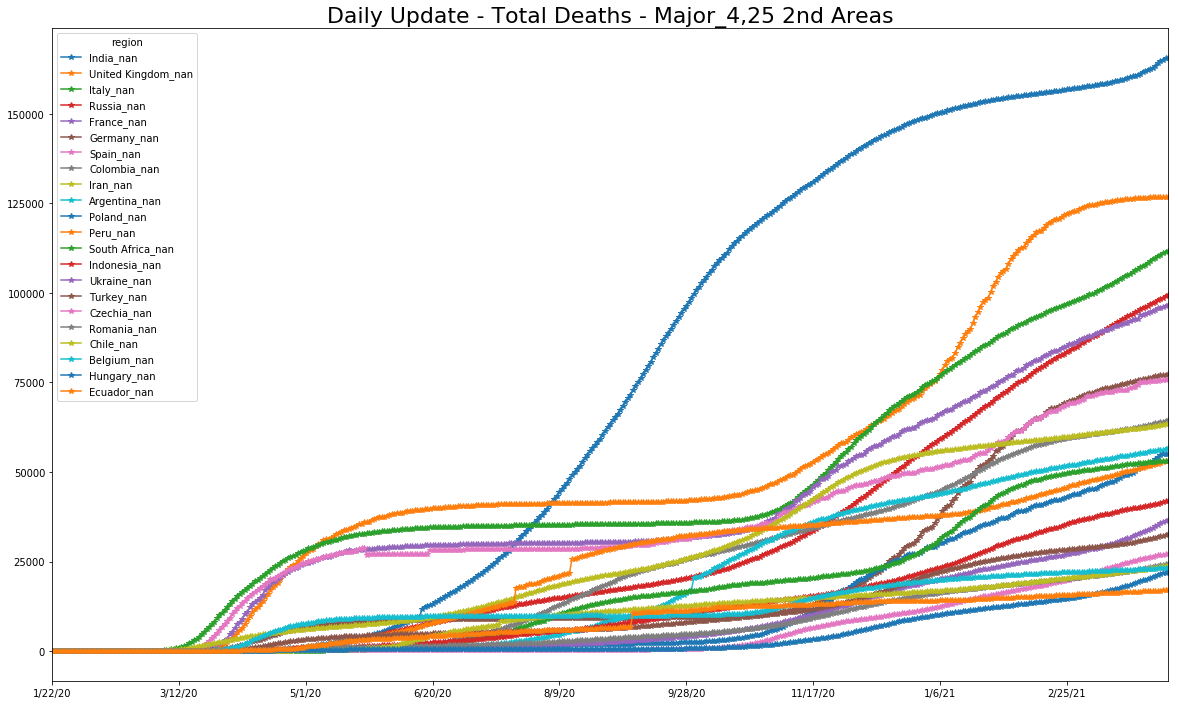

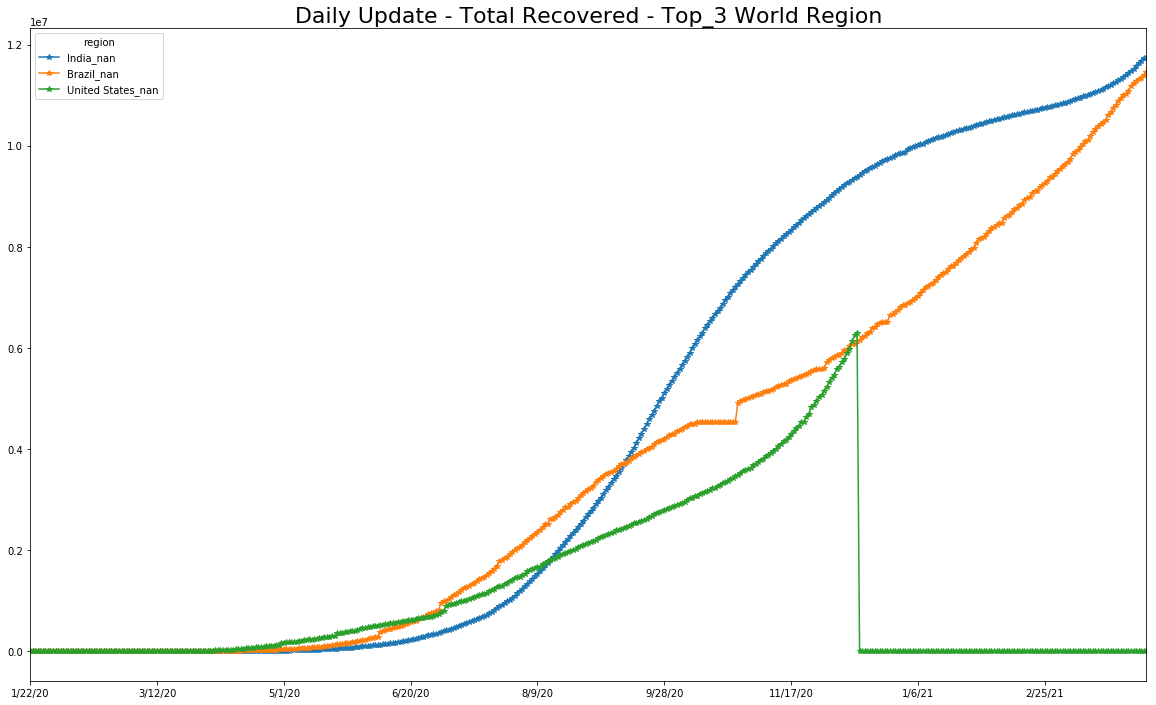

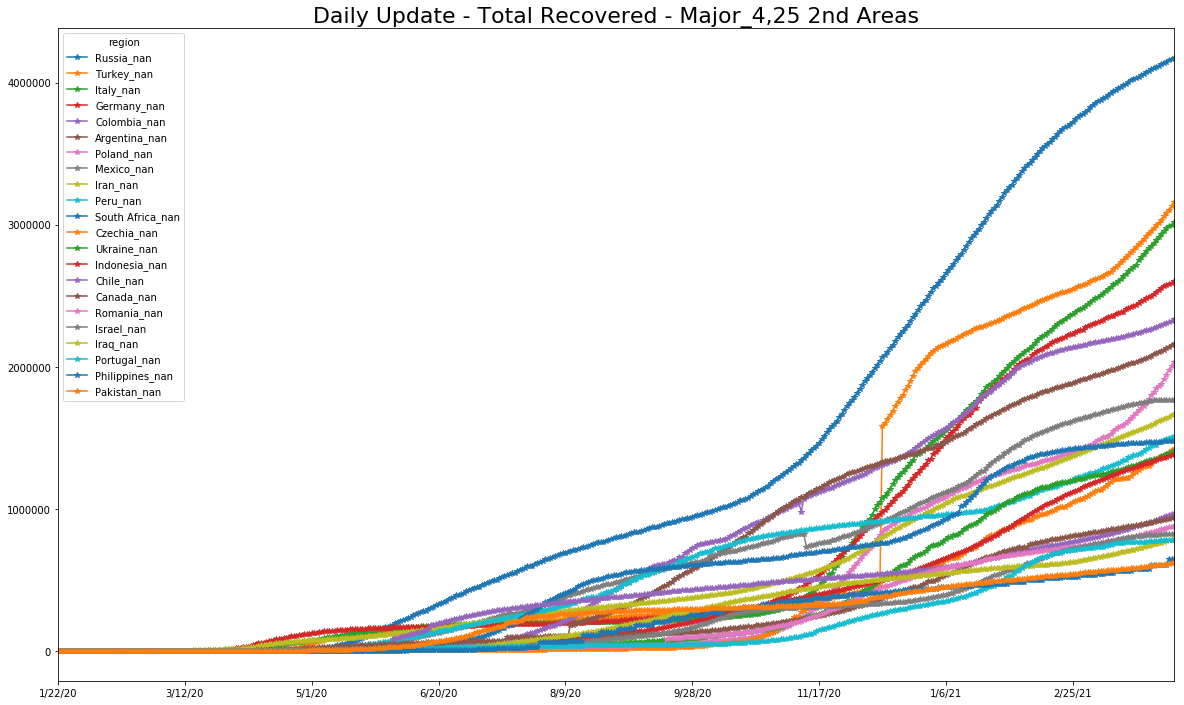

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/04/07


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522801         1808           47287            0   
9/14/20  ...            6557227         1812           47836            0   
9/15/20  ...            6596783         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 274 columns]

In [25]:
ts[-4:]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/3/21            56595       126183       117524        12174       22579   
4/4/21            56676       126531       117622        12231       22631   
4/5/21            56717       126795       117739        12286       22717   
4/6/21            56779       126936       117879        12328       22885   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/3/21                     1170        2383537       196044   
4/4/21                     1170        2393492       196634   
4/5/21                     1173        2407159       197113   
4/6/21                     1173        2428029       197873   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
4/3/21                                     123                       5300   
4/4/21                                     123                       5303   
4/5/21                                     123                       5310   
4/6/21                                     123                       5316   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
4/3/21  ...           30672664       113904           83435            3   
4/4/21  ...           30707596       117757           83623            3   
4/5/21  ...           30785390       119958           83802            3   
4/6/21  ...           30846396       123063           83935            3   

region  Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
4/3/21         164337         2626                  248482       4697   
4/4/21         166123         2631                  251288       4798   
4/5/21         167548         2637                  253922       4881   
4/6/21         169074         2648                  256461       4975   

region  Zambia_nan  Zimbabwe_nan  
4/3/21       88800         36911  
4/4/21       88930         36923  
4/5/21       89009         36934  
4/6/21       89071         36966  

[4 rows x 274 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
57930 2021-03-09     Zimbabwe_nan      36321            18            41   
57931 2021-03-10     Zimbabwe_nan      36341            32            61   
57932 2021-03-11     Zimbabwe_nan      36377            20            70   
57933 2021-03-12     Zimbabwe_nan      36423            36            88   
57934 2021-03-13     Zimbabwe_nan      36471            46           102   
57935 2021-03-14     Zimbabwe_nan      36484            48           130   
57936 2021-03-15     Zimbabwe_nan      36504            13           107   
57937 2021-03-16     Zimbabwe_nan      36535            20            81   
57938 2021-03-17     Zimbabwe_nan      36552            31            64   
57939 2021-03-18     Zimbabwe_nan      36611            17            68   
57940 2021-03-19     Zimbabwe_nan      36652            59           107   
57941 2021-03-20     Zimbabwe_nan      36662            41           117   
57942 2021-03-21     Zimbabwe_nan      36665            10           110   
57943 2021-03-22     Zimbabwe_nan      36684             3            54   
57944 2021-03-23     Zimbabwe_nan      36717            19            32   
57945 2021-03-24     Zimbabwe_nan      36749            33            55   
57946 2021-03-25     Zimbabwe_nan      36778            32            84   
57947 2021-03-26     Zimbabwe_nan      36805            29            94   
57948 2021-03-27     Zimbabwe_nan      36818            27            88   
57949 2021-03-28     Zimbabwe_nan      36822            13            69   
57950 2021-03-29     Zimbabwe_nan      36839             4  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
57959 2021-04-07  Zimbabwe_nan          0            32            55   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
57959           127         100.086668         100.149034          100.34477   

       last_day  kalman_prediction  population  infected_rate  min  max  
57959     36966            36972.0    14862924       0.000025  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
57959 2021-04-07  Zimbabwe_nan          0            32            55   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
57959           127         100.086668         100.149034          100.34477   

       last_day  kalman_prediction  population  infected_rate  min  max  
57959     36966            36972.0    14862924       0.000025  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
56715  2021-04-05  Zimbabwe_nan      36934            12            27   
56716  2021-04-06  Zimbabwe_nan      36966            11            31   
56717  2021-04-07  Zimbabwe_nan          0            32            55   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
56715           101         100.032538         100.073206         100.274320   
56716            95         100.029819         100.084031         100.257906   
56717           127         100.086668         100.149034         100.344770   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
56715                36923  ...    14862924       0.000025  NaN  NaN   
56716                36934  ...    14862924       0.000025  NaN  NaN   
56717                36966  ...    14862924       0.000025  NaN  NaN   

       population_percentage : infected_rate confirmed  \
56715                                         0.002484   
56716                                         0.002485   
56717                                         0.002487   

       population_percentage : factor 9/10 infected_rate confirmed  \
56715                                           0.022359             
56716                                           0.022365             
56717                                           0.022385             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
56715                    18.0                           1.211067   
56716                    15.0                           1.009223   
56717                     6.0                           0.403689   

       delta : roling 7day AVG  \
56715                14.428571   
56716                13.571429   
56717                18.142857   

       delta : aprox 14-day case notification rate per 100k hab  
56715                                           1.359087         
56716                                           1.278349         
56717                                           1.708950         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
264  United States_nan  4.644370e+12  2.155080e+06  179941.674757


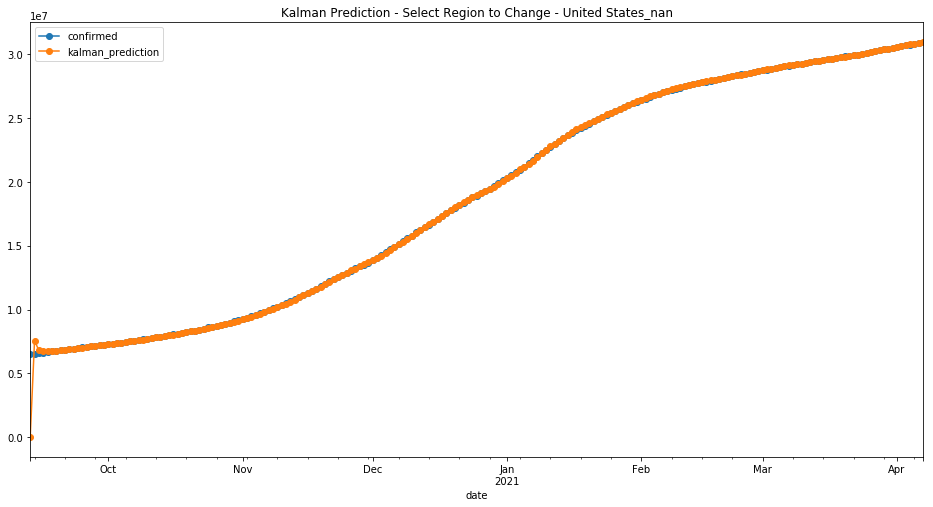

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
213  Russia_nan  1.008658e+11  317593.707228  24826.451456


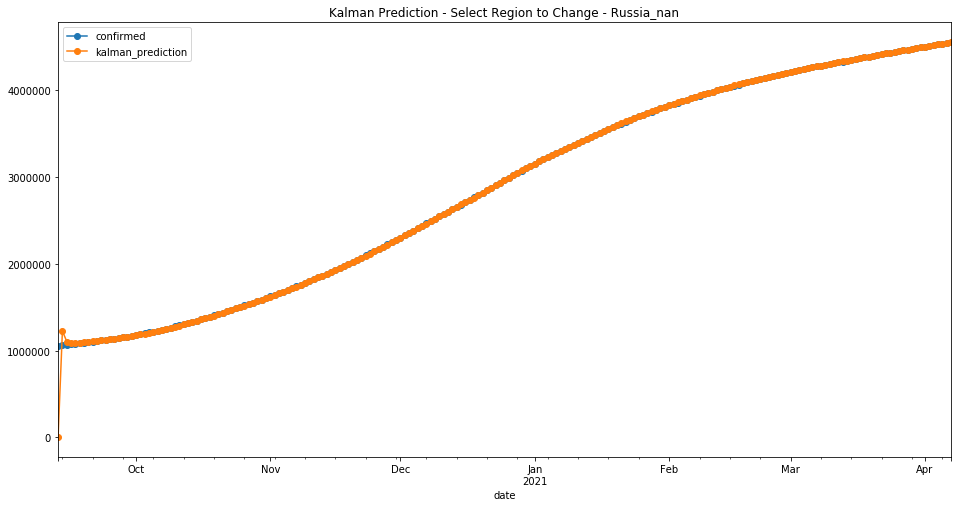

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  8.429403e+11  918117.781305  86316.796117


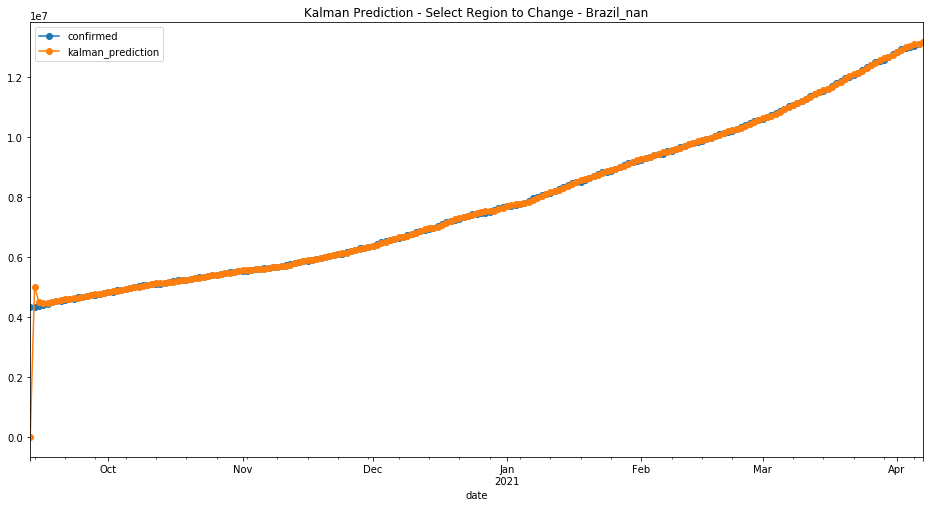

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
263  United Kingdom_nan  9.271199e+10  304486.435958  26563.776699


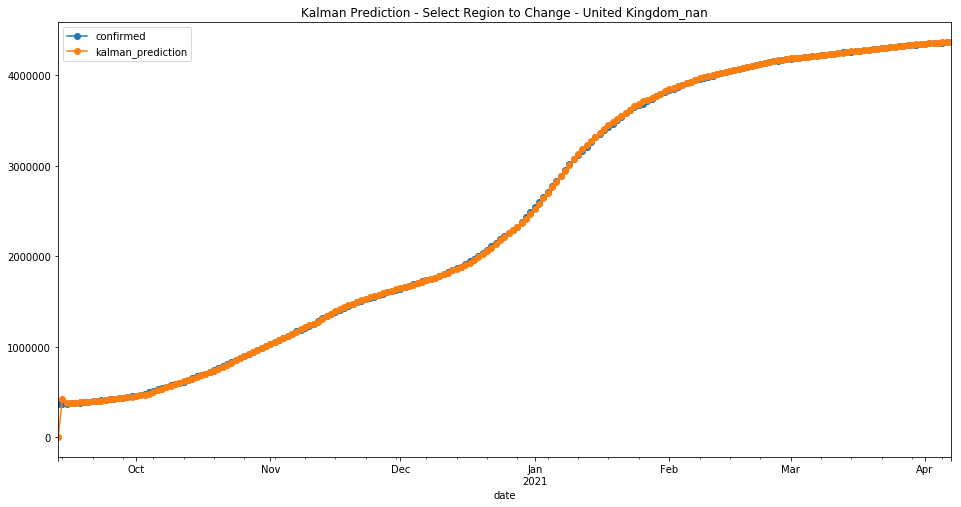

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcxgjss51
  JVM stdout: /tmp/tmpcxgjss51/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcxgjss51/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 5 months and 11 days !!!
H2O cluster name:           H2O_from_python_unknownUser_u02gwo
H2O cluster total nodes:    1
H2O cluster free memory:    3.543 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-03-14
last_train_date= 2021-04-06
first_bootstrap_date= 2021-03-29
boost_bootstrap_date= 2021-04-03
first_test_date= 2021-03-28
last_test_date= 2021-04-07
first_valid_date= 2021-04-05


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    56503.0      56322 2021-03-29  Afghanistan_nan
1    56528.0      56384 2021-03-30  Afghanistan_nan
2    56578.0      56454 2021-03-31  Afghanistan_nan
3    56646.0      56517 2021-04-01  Afghanistan_nan
4    56717.0      56572 2021-04-02  Afghanistan_nan
5    56783.0      56595 2021-04-03  Afghanistan_nan
6    56821.0      56676 2021-04-04  Afghanistan_nan
7    56890.0      56717 2021-04-05  Afghanistan_nan
8    56938.0      56779 2021-04-06  Afghanistan_nan
9    57003.0          0 2021-04-07  Afghanistan_nan
10  124540.0     124419 2021-03-29      Albania_nan
11  124825.0     124723 2021-03-30      Albania_nan
12  125129.0     125157 2021-03-31      Albania_nan
13  125533.0     125506 2021-04-01      Albania_nan
14  125864.0     125842 2021-04-02      Albania_nan
15  126200.0     126183 2021-04-03      Albania_nan
16  126529.0     126531 2021-04-04      Albania_nan
17  126872.0     126795 2021-04-05      Albania_nan
18  127126.0     126936 2021-04-06      Albania_nan
19  127263.0          0 2021-04-07      Albania_nan
20  117093.0     116946 2021-03-29      Algeria_nan
21  117199.0     117061 2021-03-30      Algeria_nan
22  117312.0     117192 2021-03-31      Algeria_nan
23  117444.0     117304 2021-04-01      Algeria_nan
24  117560.0     117429 2021-04-02      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  268101.0     268174 2021-04-03  Azerbaijan_nan
176  270064.0     270735 2021-04-04  Azerbaijan_nan
177  272799.0     271834 2021-04-05  Azerbaijan_nan
178  273803.0     273869 2021-04-06  Azerbaijan_nan
179  276013.0          0 2021-04-07  Azerbaijan_nan
180    9066.0       9000 2021-03-29     Bahamas_nan
181    8979.0       9119 2021-03-30     Bahamas_nan
182    8987.0       9119 2021-03-31     Bahamas_nan
183    9288.0       9171 2021-04-01     Bahamas_nan
184    9231.0       9171 2021-04-02     Bahamas_nan
185    9334.0       9171 2021-04-03     Bahamas_nan
186    9340.0       9171 2021-04-04     Bahamas_nan
187    9323.0       9171 2021-04-05     Bahamas_nan
188    9315.0       9270 2021-04-06     Bahamas_nan
189    9188.0          0 2021-04-07     Bahamas_nan
190  142362.0     142669 2021-03-29     Bahrain_nan
191  143210.0     143574 2021-03-30     Bahrain_nan
192  144159.0     144445 2021-03-31     Bahrain_nan
193  145034.0     145380 2021-04-01     Bahrain_nan
194  145984.0     146454 2021-04-02     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  319880.0     319599 2021-03-29  Belarus_nan
221  320786.0     320594 2021-03-30  Belarus_nan
222  321756.0     321807 2021-03-31  Belarus_nan
223  322936.0     323043 2021-04-01  Belarus_nan
224  324120.0     324694 2021-04-02  Belarus_nan
225  325802.0     326065 2021-04-03  Belarus_nan
226  327167.0     327304 2021-04-04  Belarus_nan
227  328487.0     328290 2021-04-05  Belarus_nan
228  329501.0     329258 2021-04-06  Belarus_nan
229  330488.0          0 2021-04-07  Belarus_nan
230  875792.0     872936 2021-03-29  Belgium_nan
231  877762.0     876842 2021-03-30  Belgium_nan
232  881803.0     882453 2021-03-31  Belgium_nan
233  887160.0     887920 2021-04-01  Belgium_nan
234  892308.0     892585 2021-04-02  Belgium_nan
235  896961.0     897474 2021-04-03  Belgium_nan
236  902016.0     900996 2021-04-04  Belgium_nan
237  905452.0     902964 2021-04-05  Belgium_nan
238  907209.0     904673 2021-04-06  Belgium_nan
239  908711.0          0 2021-04-07  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  6766852076.116317
# MSE on the validation data =  12850230526803.053
# R^2 on the training data =  0.9995677715973296
# R^2 on the validation data =  0.42047935750600596


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1617773661499_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6766852076.116317
RMSE: 82260.87816280784
MAE: 7660.212602491213
RMSLE: 0.21604970915728633
Mean Residual Deviance: 6766852076.116317

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 12850230526803.053
RMSE: 3584721.820002642
MAE: 926537.6459255349
RMSLE: 7.615078065306849
Mean Residual Deviance: 12850230526803.053
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2021-04-07 05:34:28  0.053 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2021-04-07 05:34:29  0.446 sec   1.0                117767.84907377485  18710.93755712441   13869266275.463413   3575812.5545649487  916887.4667802759   12786435425384.303
     2021-04-07 05:34:29  0.732 sec   2.0                140020.69066386958  19914.553076965072  19605793813.987057   3534214.715301157   909927.6066157195   12490673653851.238
     2021-04-07 05:34:29  0.840 sec   3.0                152571.20697674612  20373.471308225122  23277973198.341106   3668074.9201813373  1000772.7106816059  13454773620063.324
     2021-04-07 05:34:29  0.929 sec   4.0                144773.362245773    18691.077126948618  20959326415.94581    3622791.8159927106  978901.8723984796   13124620542023.762
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2021-04-07 05:34:40  12.098 sec  179.0              83478.82517212453   8332.049011373707   6968714252.118133    3587747.897193075   928720.3577760571   12871934973813.332
     2021-04-07 05:34:44  16.125 sec  263.0              82081.36336142219   7894.203881554313   6737350211.269821    3587135.187739024   927429.1518005332   12867538855115.482
     2021-04-07 05:34:48  20.136 sec  346.0              81992.8925368954    7670.251660024711   6722834426.566876    3585212.6202919707  926842.9530444451   12853749532700.818
     2021-04-07 05:34:52  24.157 sec  423.0              82547.70256062456   7733.161205844936   6814123198.037343    3583902.149477376   926911.4193641152   12844354617028.559
     2021-04-07 05:34:56  28.011 sec  500.0              82260.87816280784   7660.212602491213   6766852076.116317    3584721.820002642   926537.6459255349   12850230526803.053


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  1.77412e+19            1                    0.321881
last_day           1.58687e+19            0.894453             0.287907
region             7.25081e+18            0.408698             0.131552
7_day_change       6.01615e+18            0.339105             0.109151
3_day_change       2.58722e+18            0.145831             0.0469402
infected_rate      2.10744e+18            0.118788             0.0382355
1_day_change       1.46794e+18            0.0827418            0.026633
max                9.85614e+17            0.055555             0.0178821
min                8.06252e+17            0.0454451            0.0146279
3_day_change_rate  1.60892e+17            0.00906881           0.00291907
7_day_change_rate  1.03869e+17            0.0058547            0.00188451
1_day_change_rate  2.13211e+16            0.00120178           0.000386831

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         1.774122e+19           1.000000    0.321881
1            last_day         1.586869e+19           0.894453    0.287907
2              region         7.250811e+18           0.408698    0.131552
3        7_day_change         6.016146e+18           0.339105    0.109151
4        3_day_change         2.587222e+18           0.145831    0.046940
5       infected_rate         2.107440e+18           0.118788    0.038235
6        1_day_change         1.467941e+18           0.082742    0.026633
7                 max         9.856140e+17           0.055555    0.017882
8                 min         8.062518e+17           0.045445    0.014628
9   3_day_change_rate         1.608917e+17           0.009069    0.002919
10  7_day_change_rate         1.038695e+17           0.005855    0.001885
11  1_day_change_rate         2.132113e+16           0.001202    0.000387

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


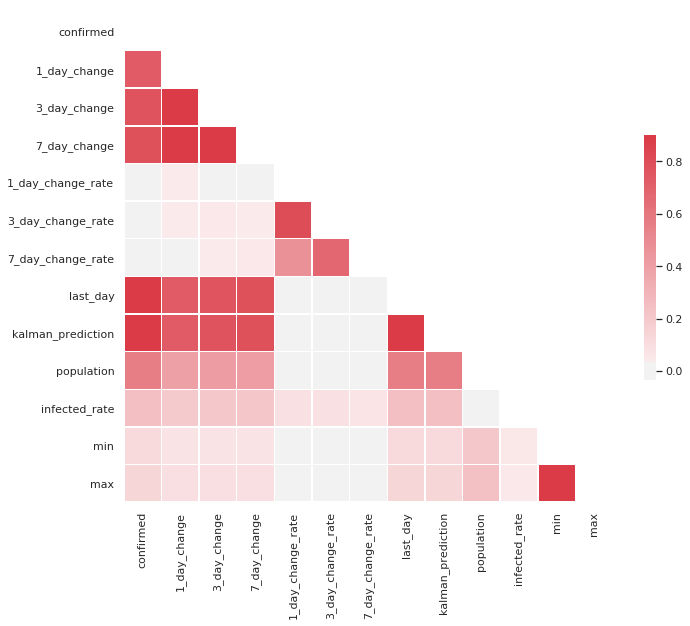

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.733208
3_day_change         0.773624
7_day_change         0.791808
1_day_change_rate    0.022481
3_day_change_rate    0.020667
7_day_change_rate    0.013575
last_day             0.993683
kalman_prediction    0.994055
population           0.562587
infected_rate        0.249599
min                  0.118407
max                  0.139909
Name: confirmed, dtype: float64


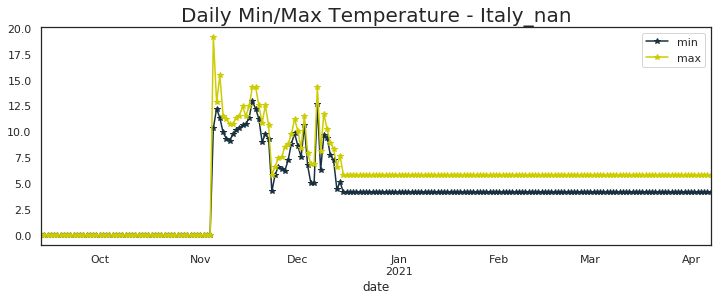

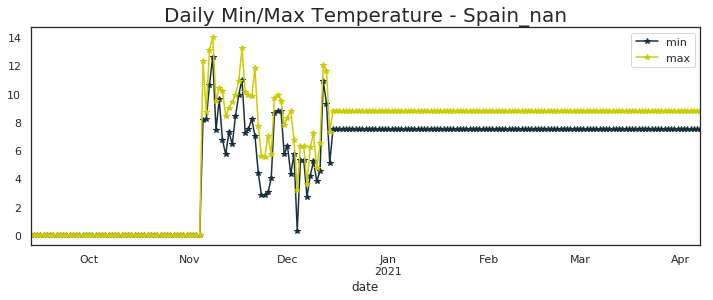

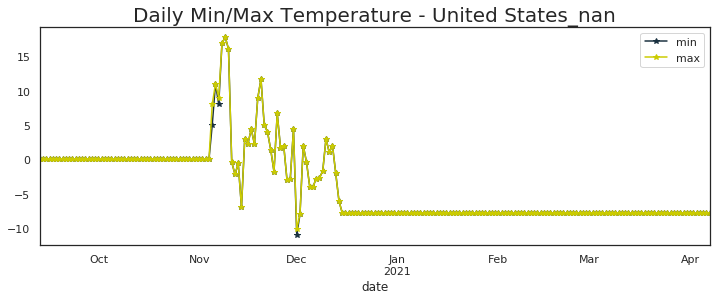

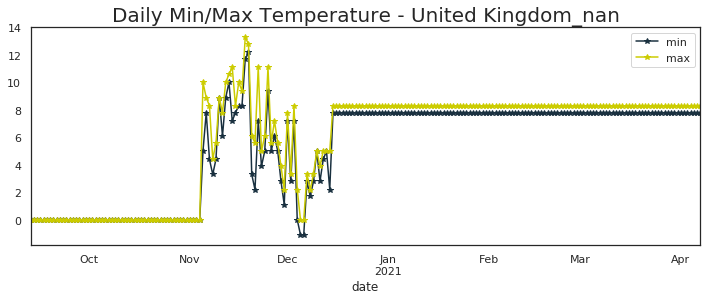

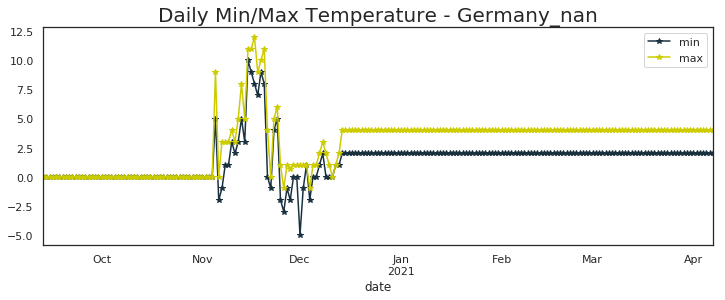

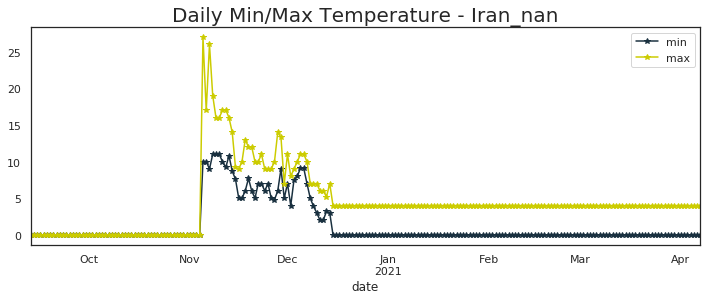

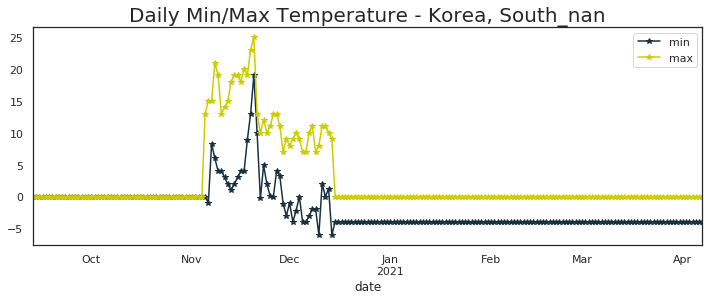

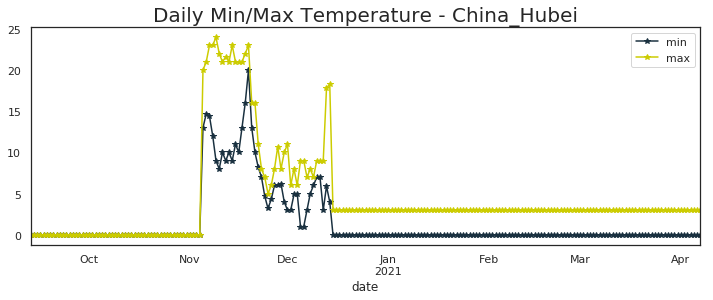

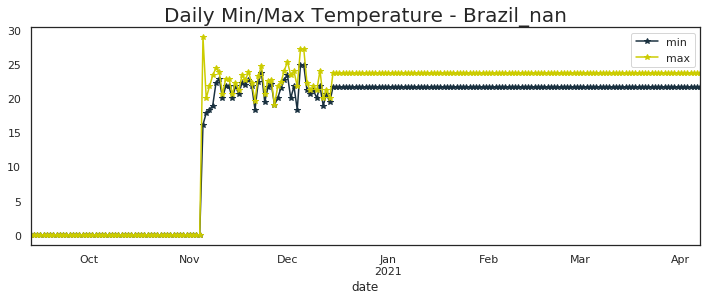

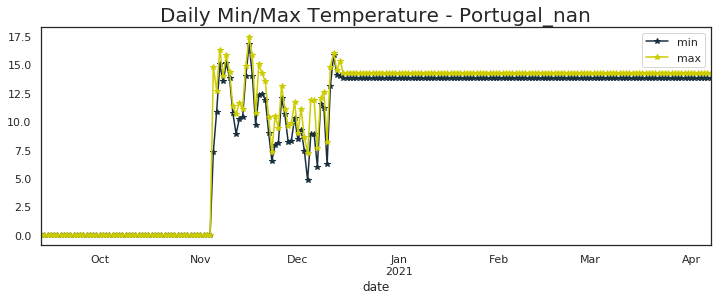

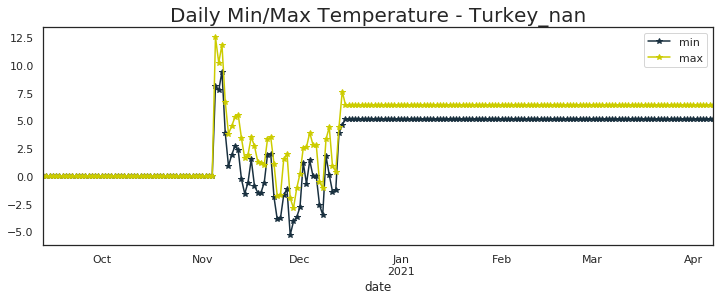

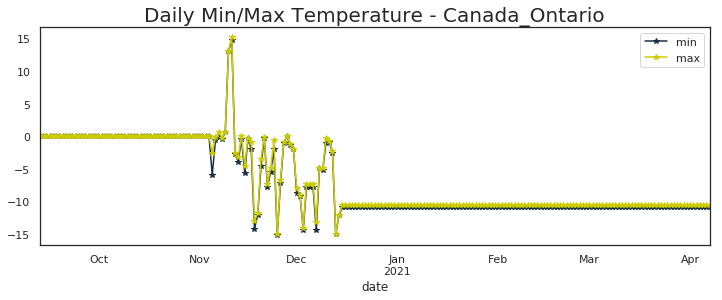

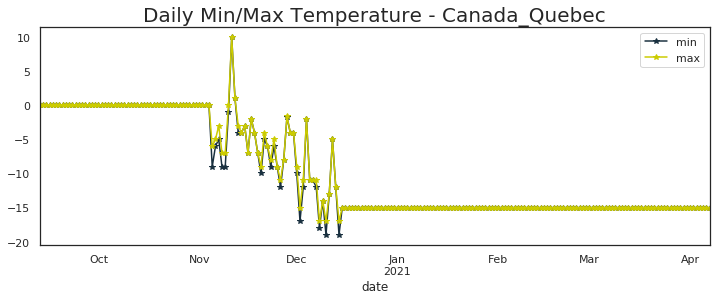

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
Brazil_nan                  24.8  28.9
India_nan                   22.0  31.0
France_nan                  12.1  13.3
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
Italy_nan                   12.9  19.1
Turkey_nan                   9.4  12.5
Spain_nan                   12.6  14.0
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Poland_nan                   8.9  10.6
Argentina_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Iran_nan                    11.0  27.0
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Czechia_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Indonesia_nan                0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Romania_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

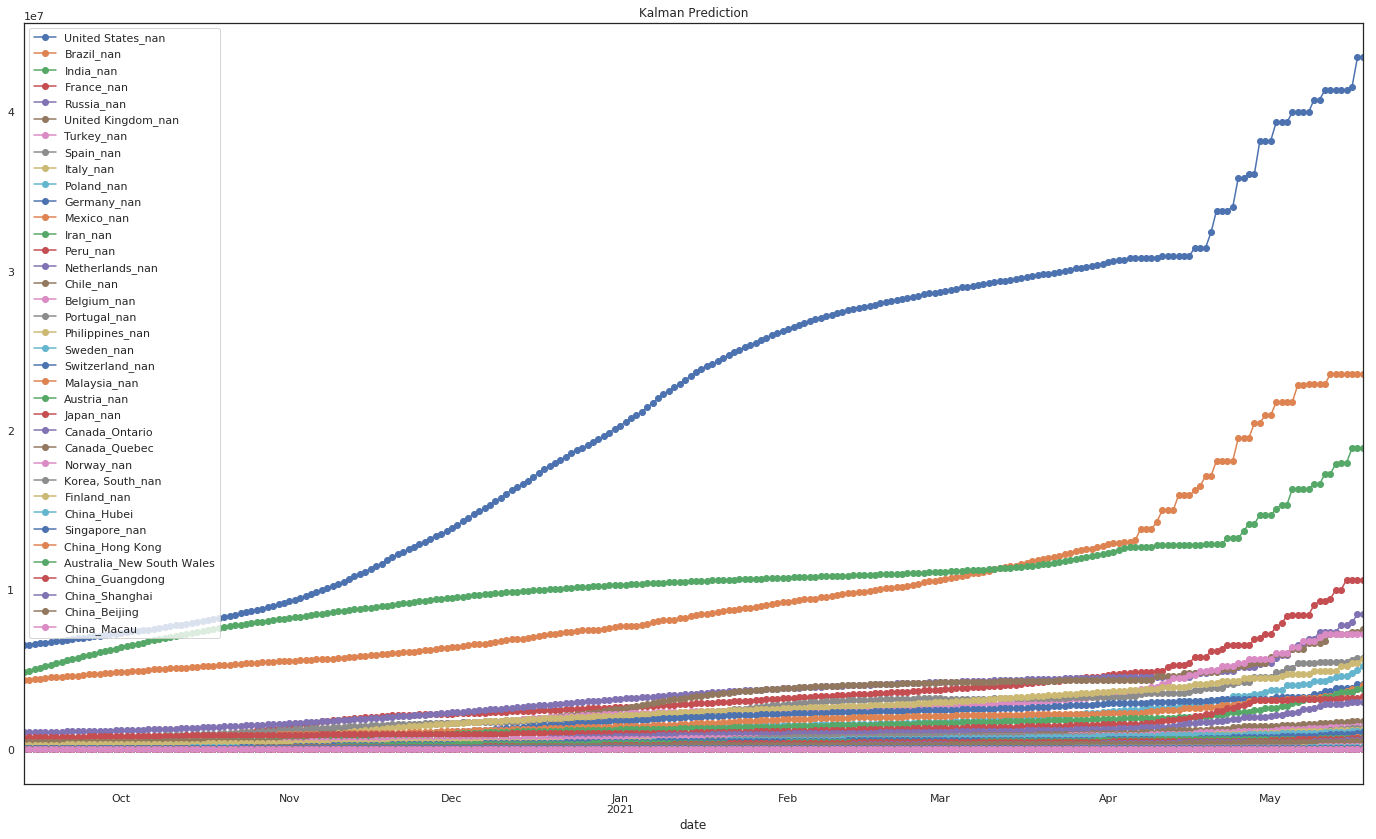

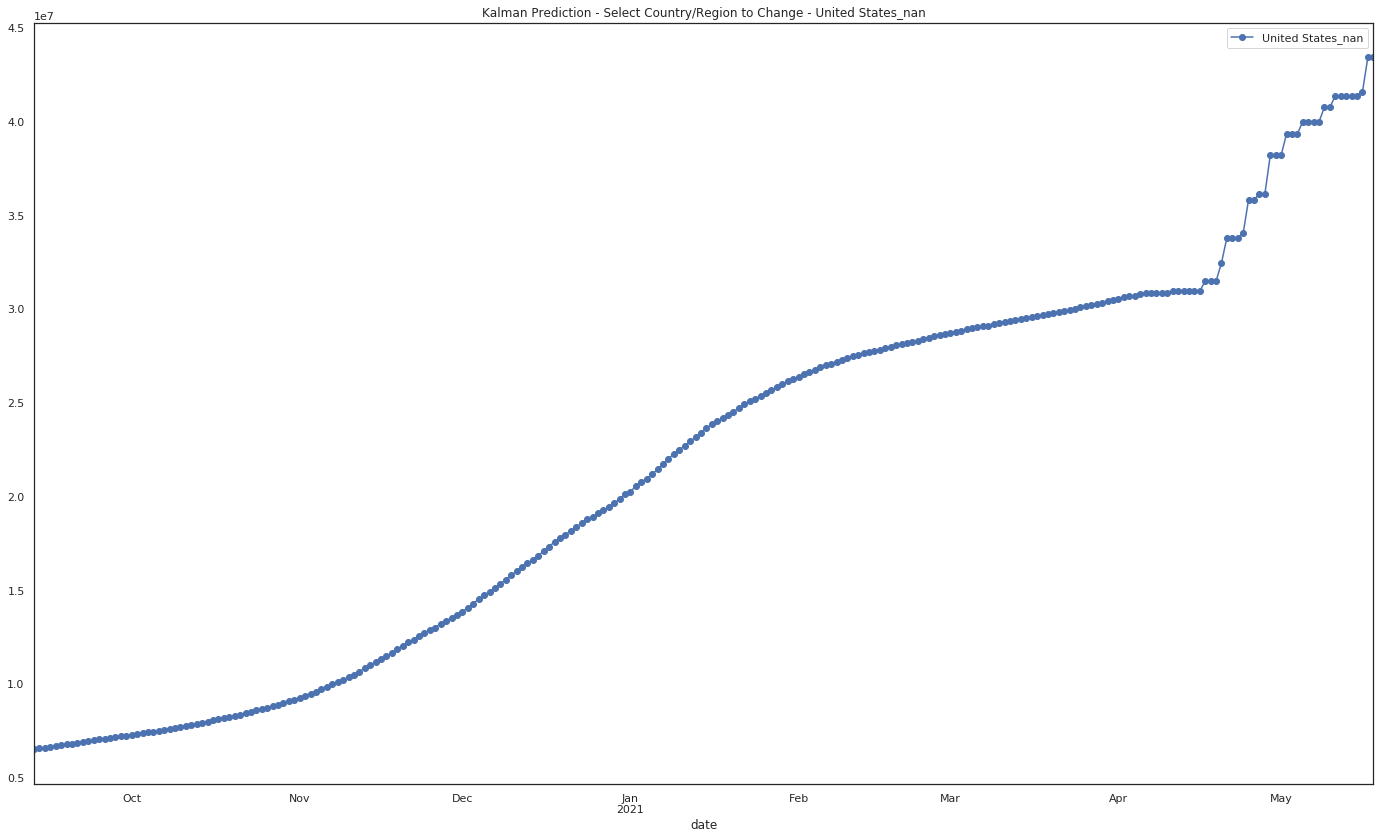

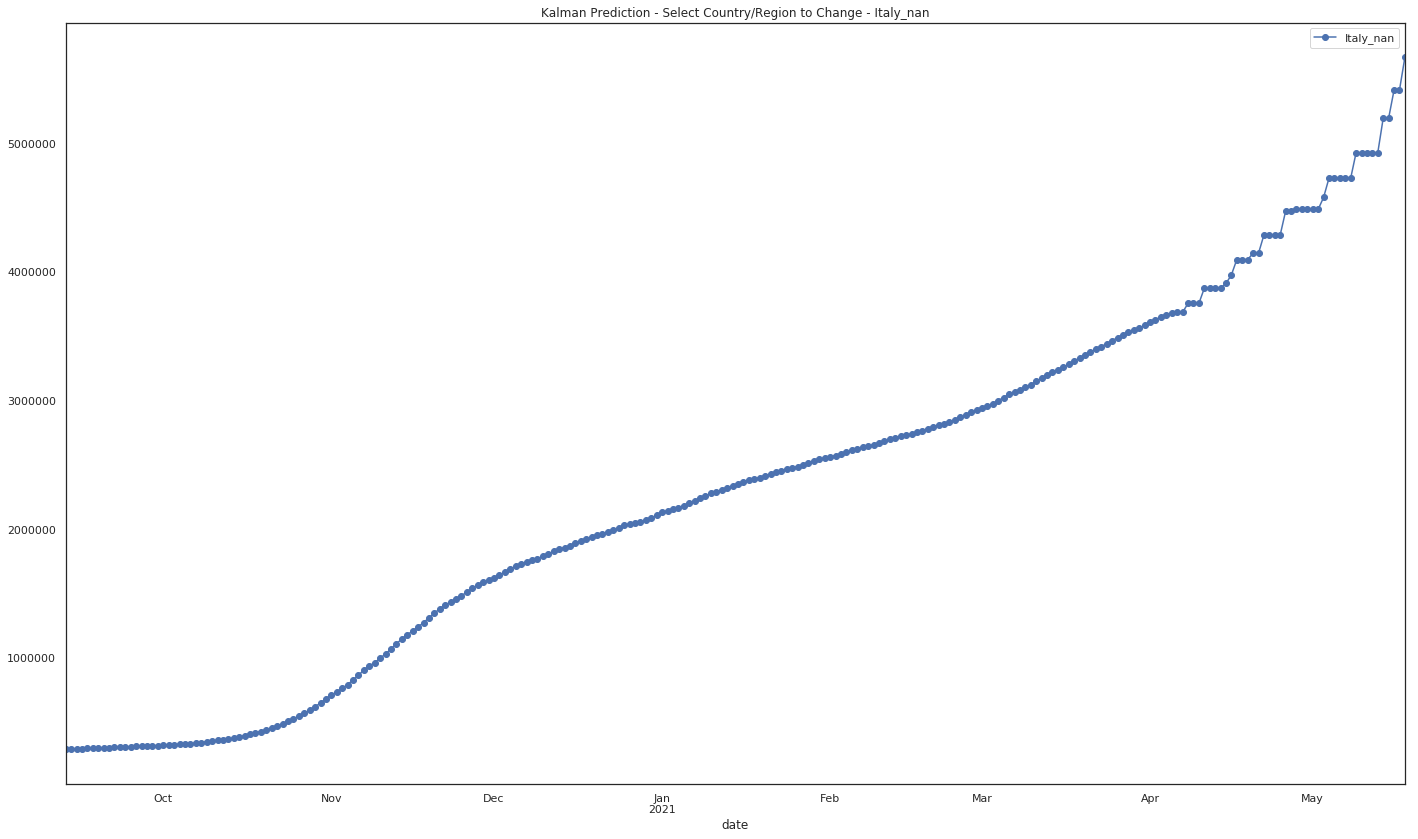

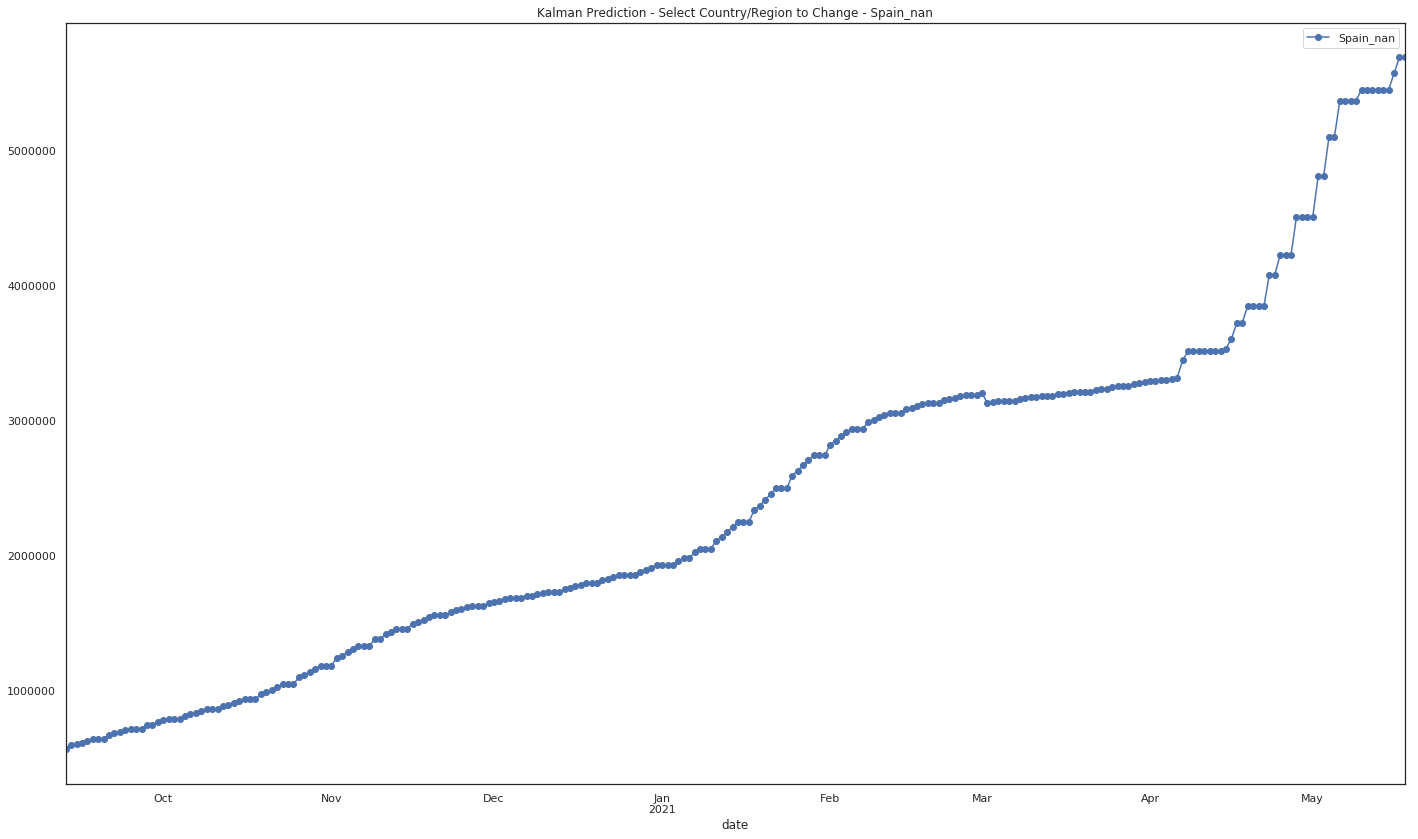

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


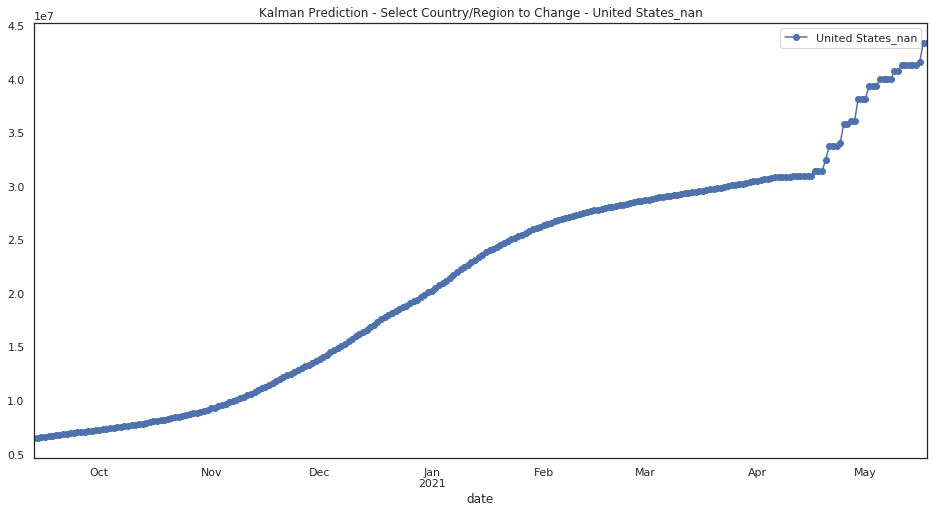

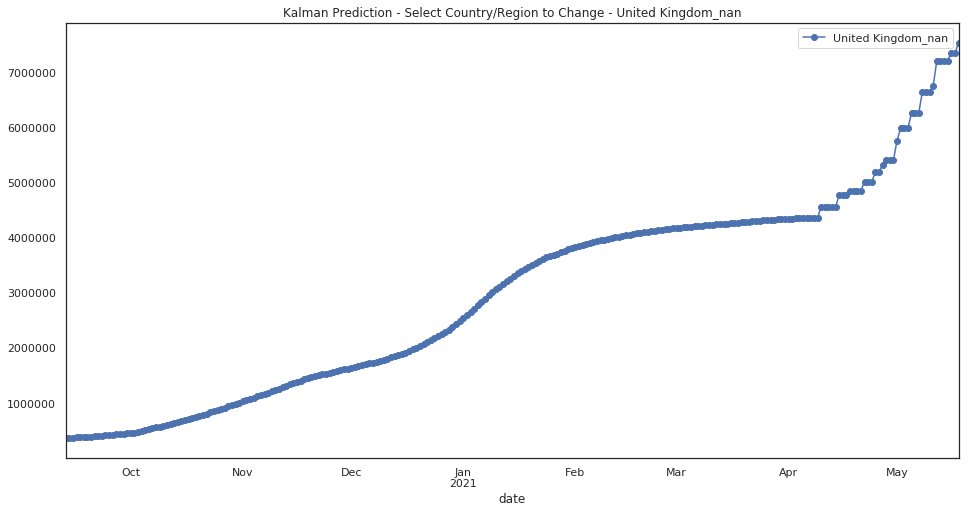

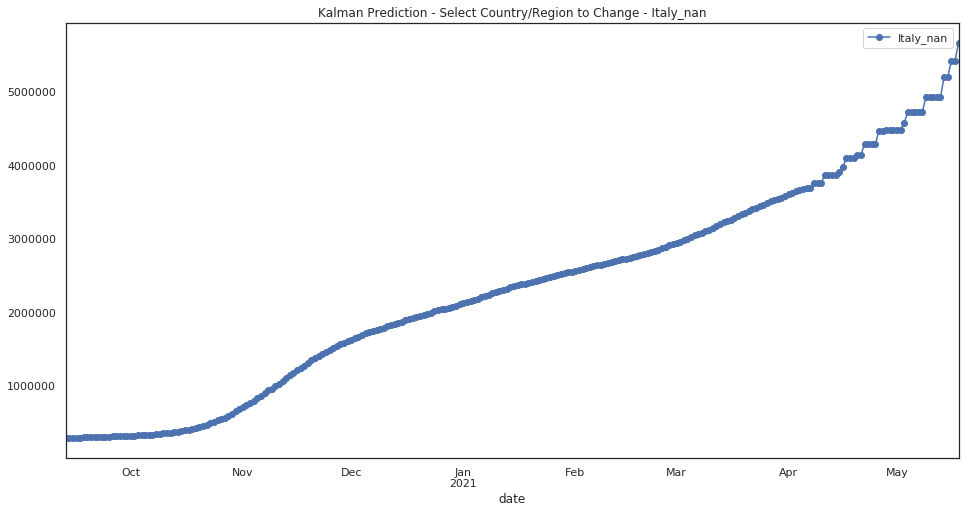

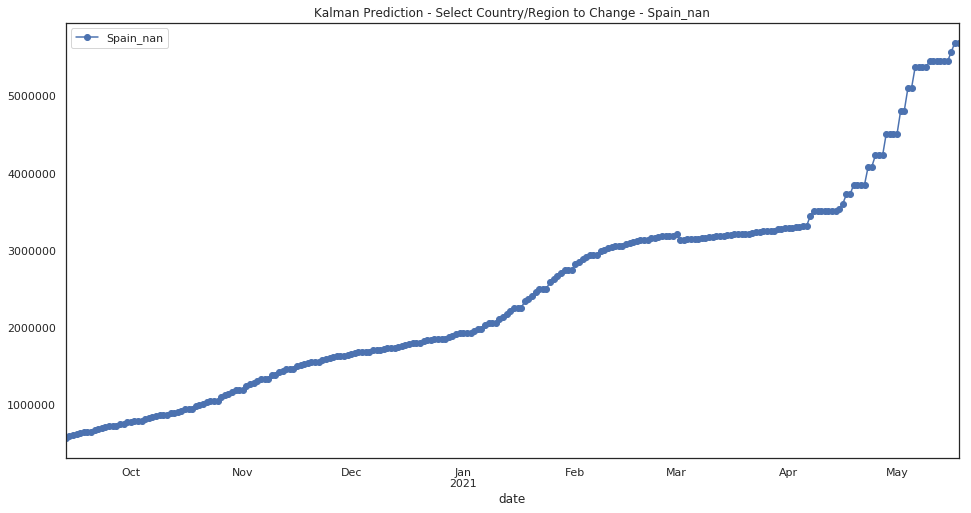

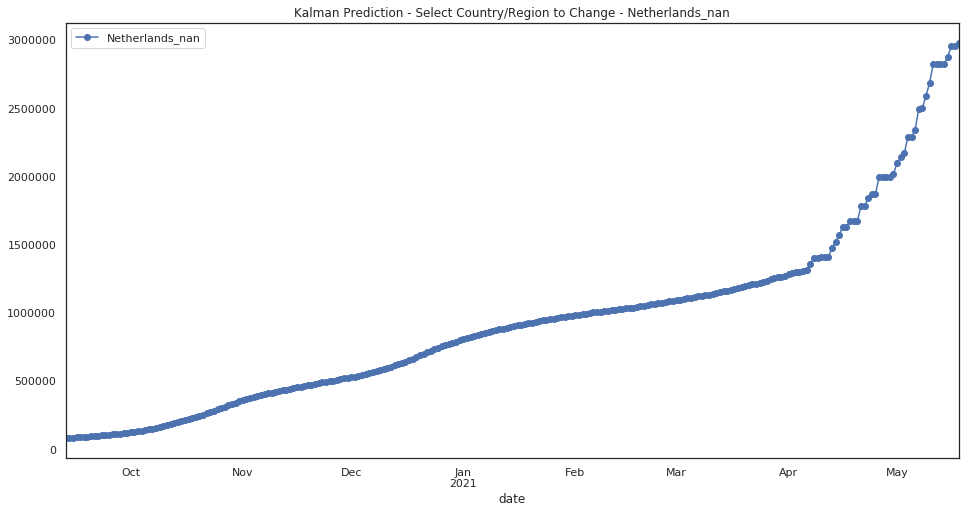

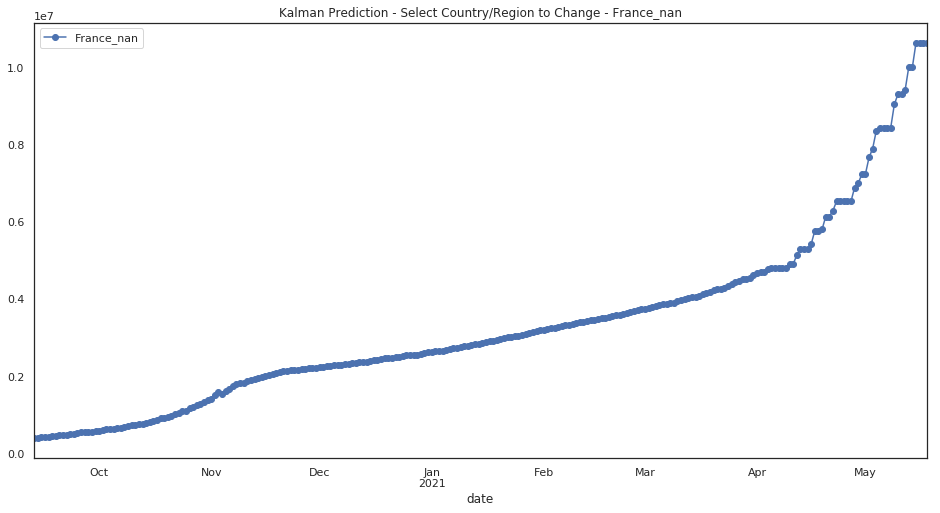

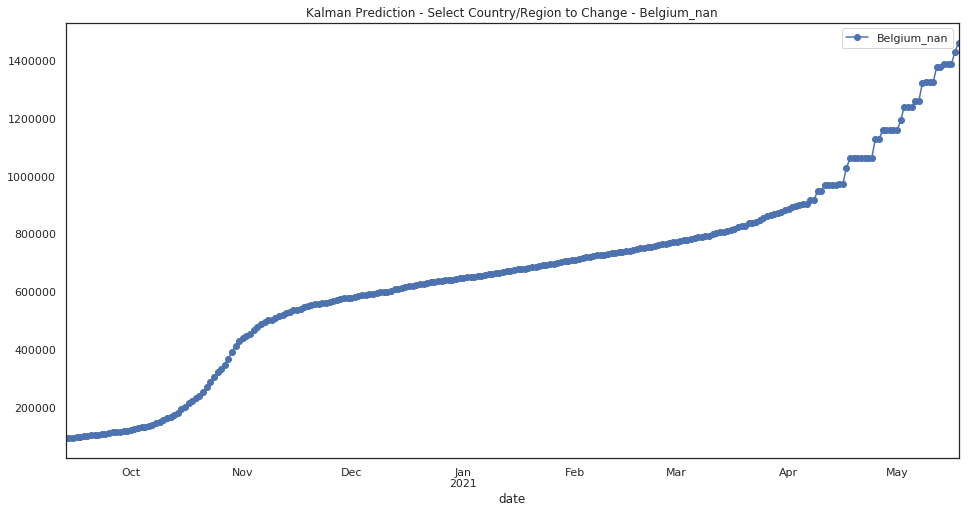

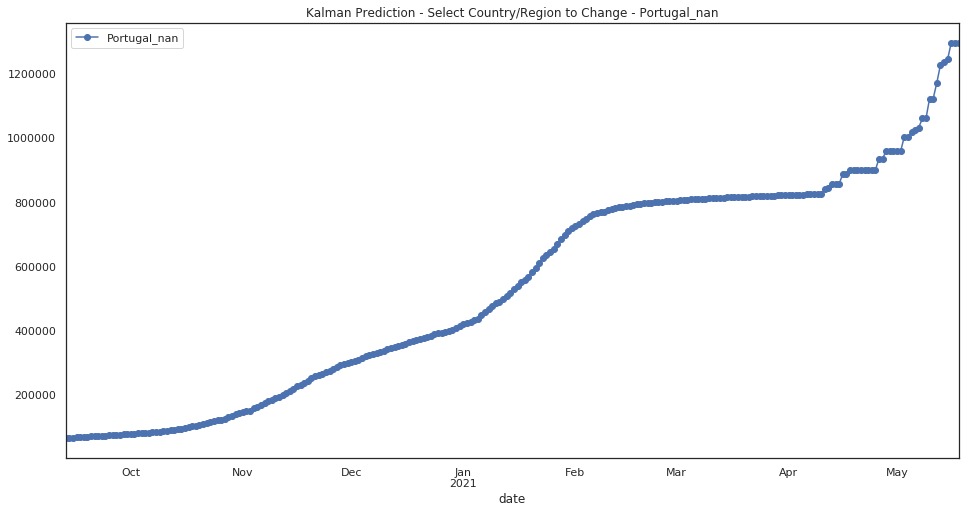

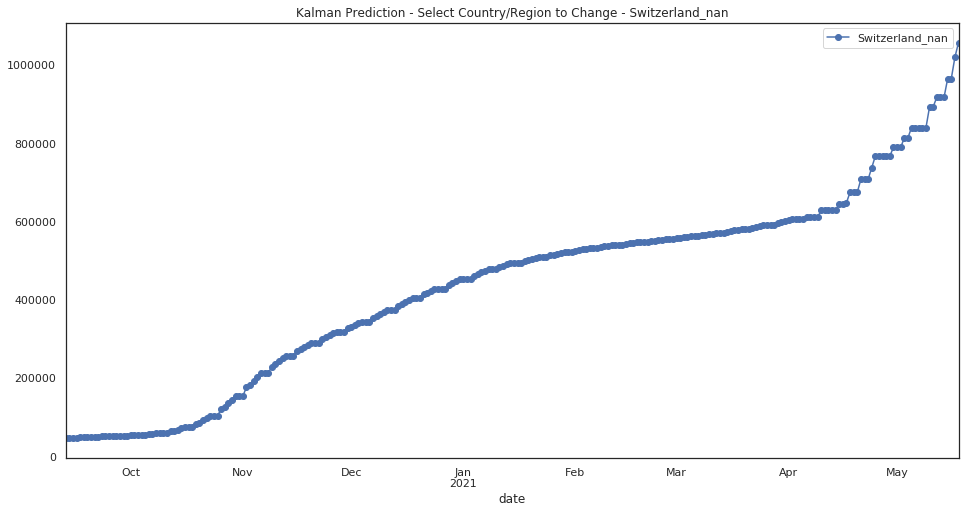

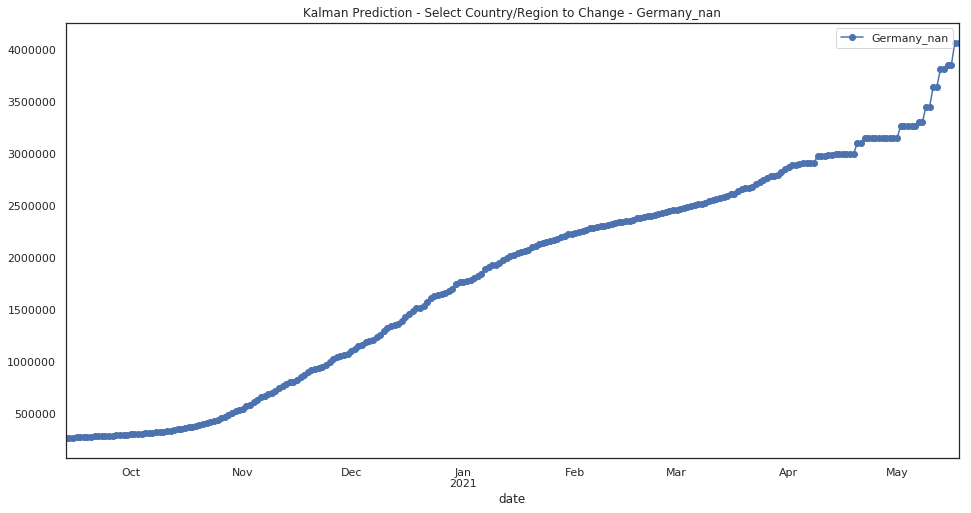

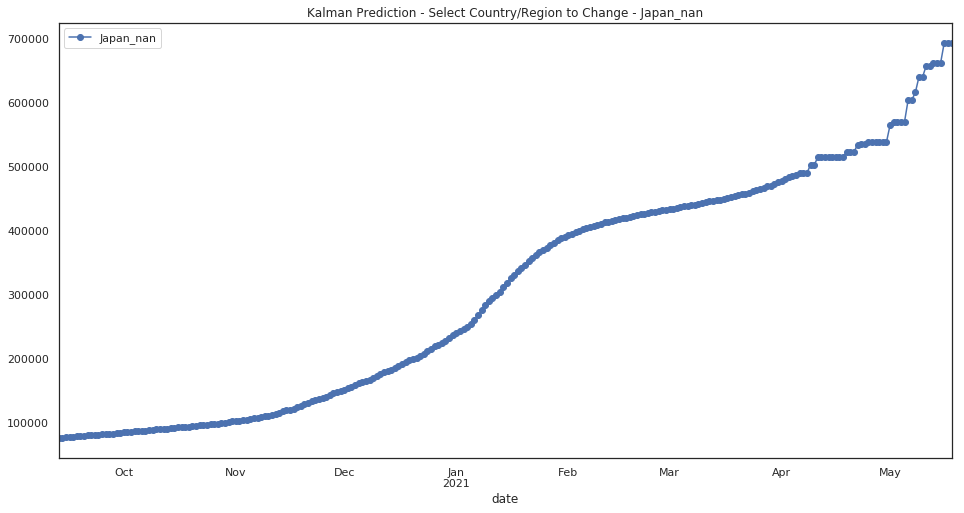

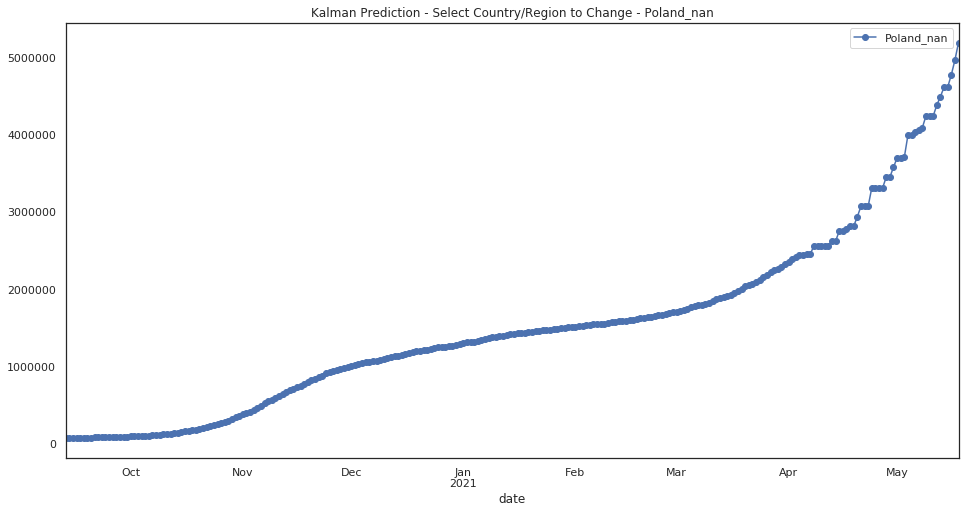

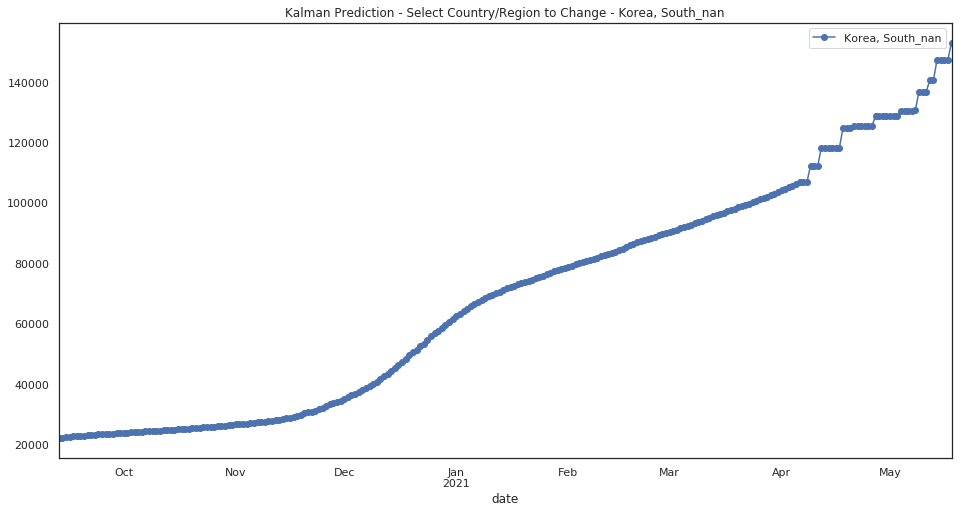

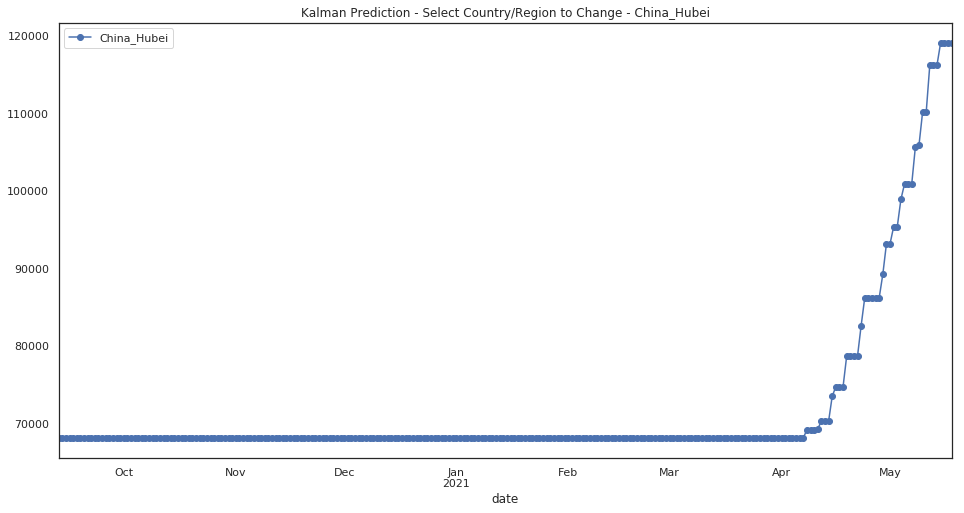

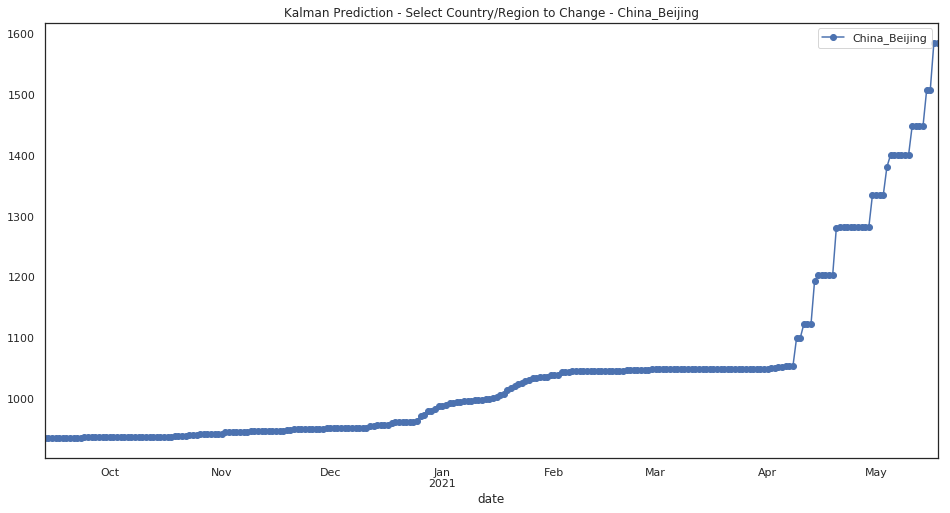

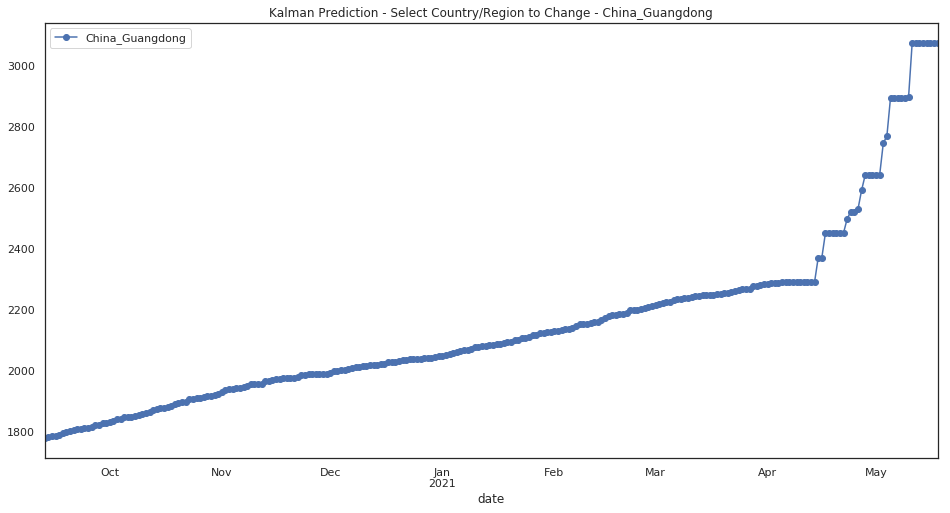

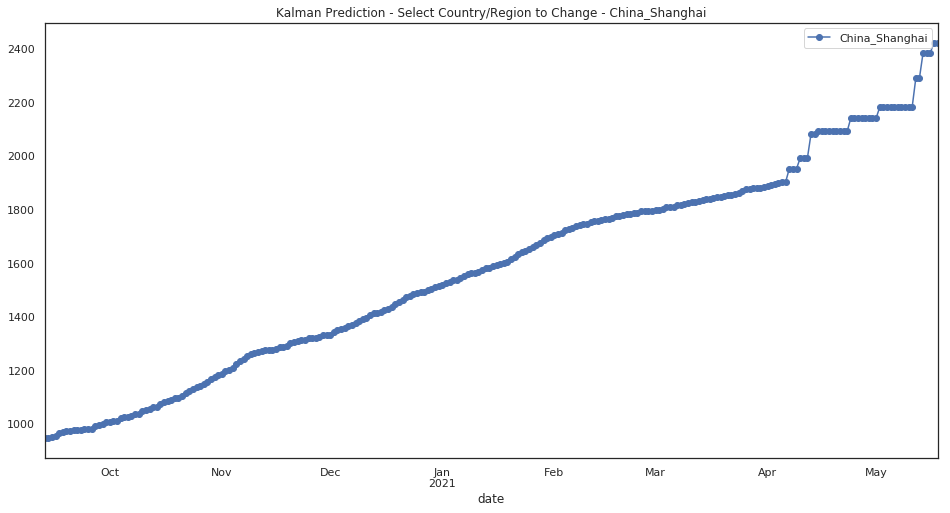

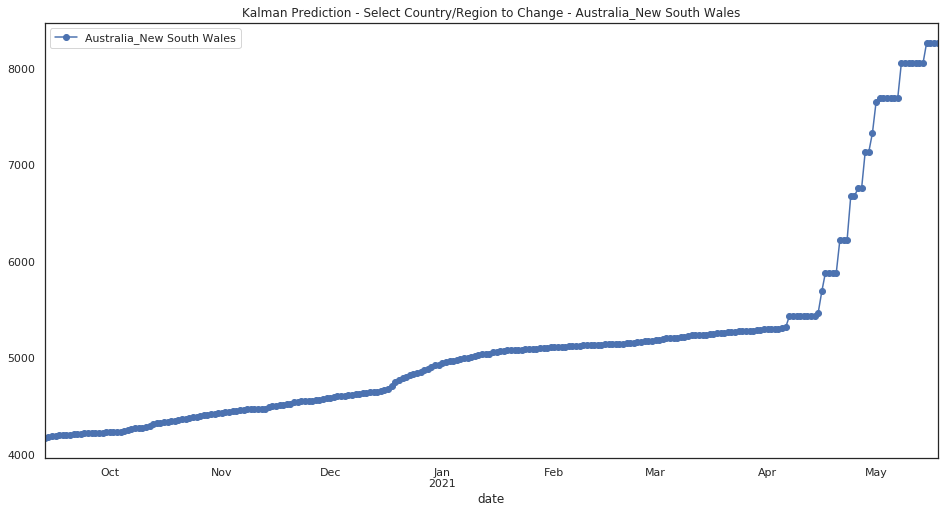

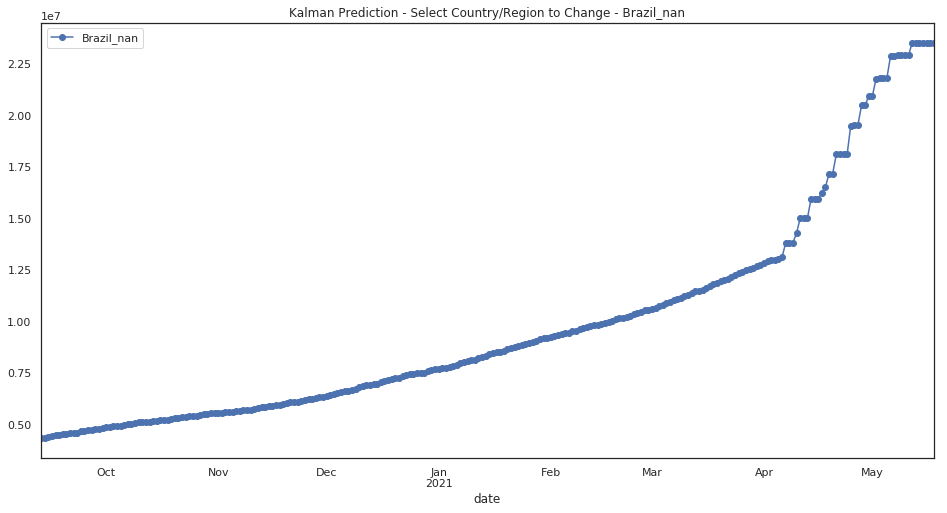

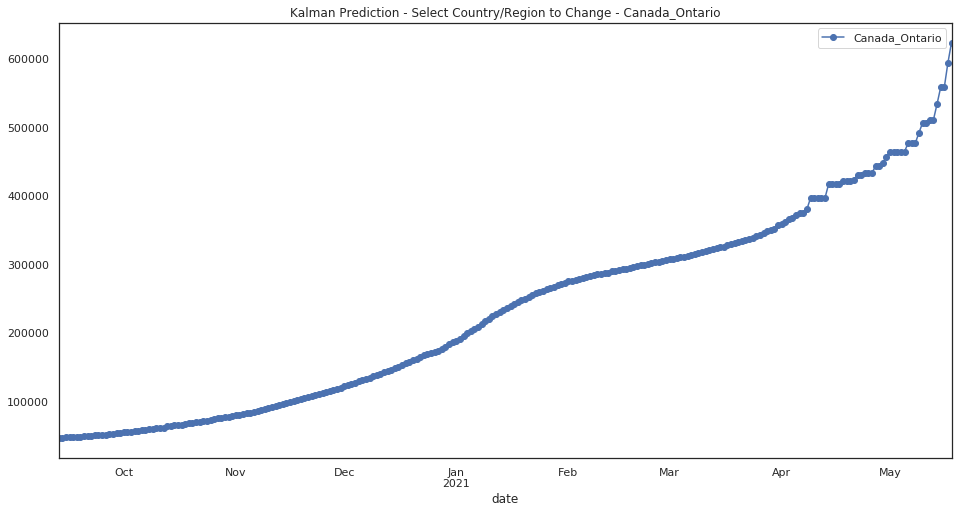

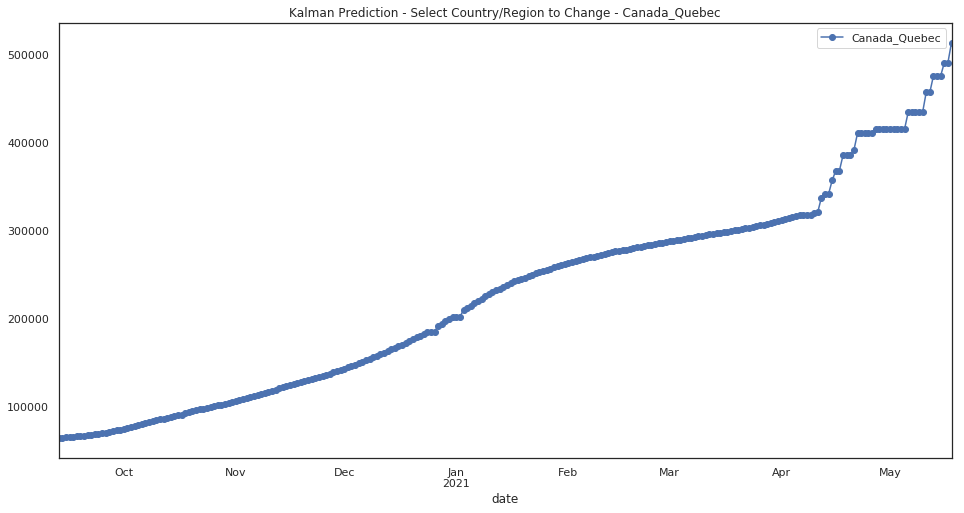

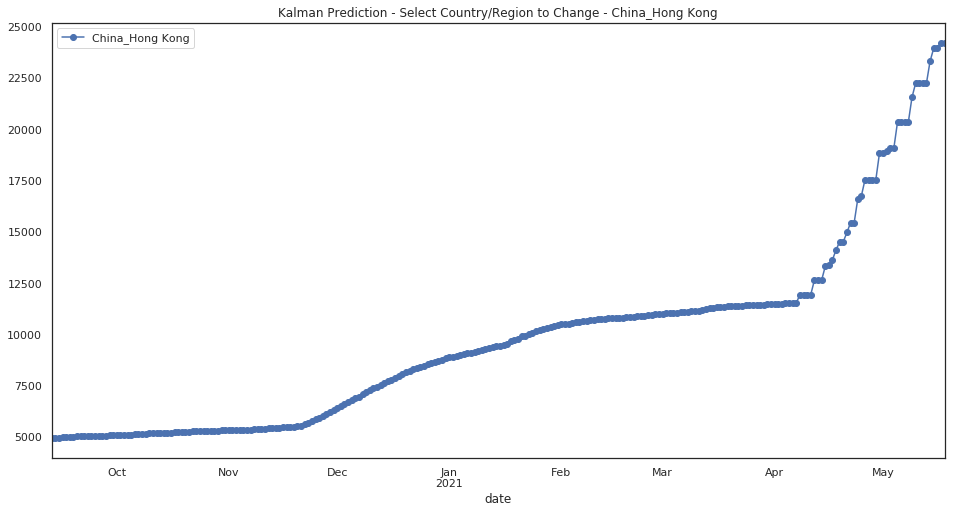

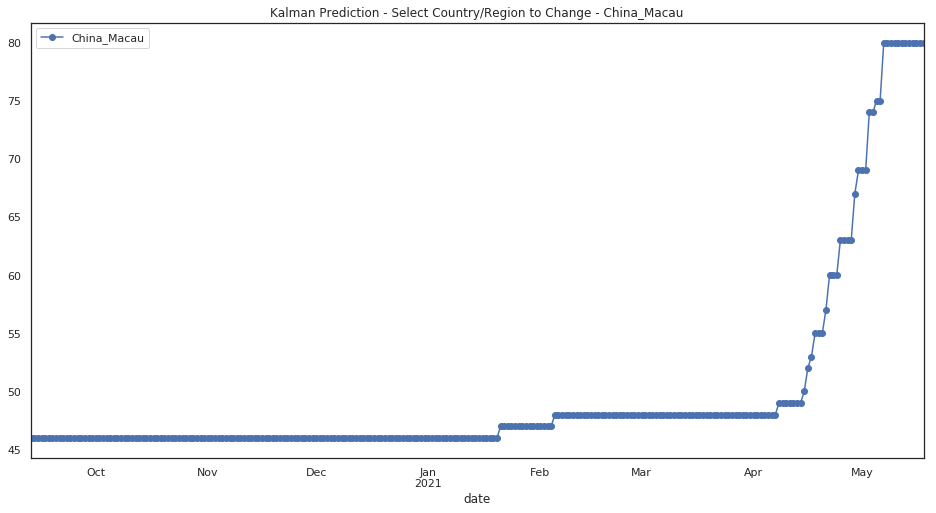

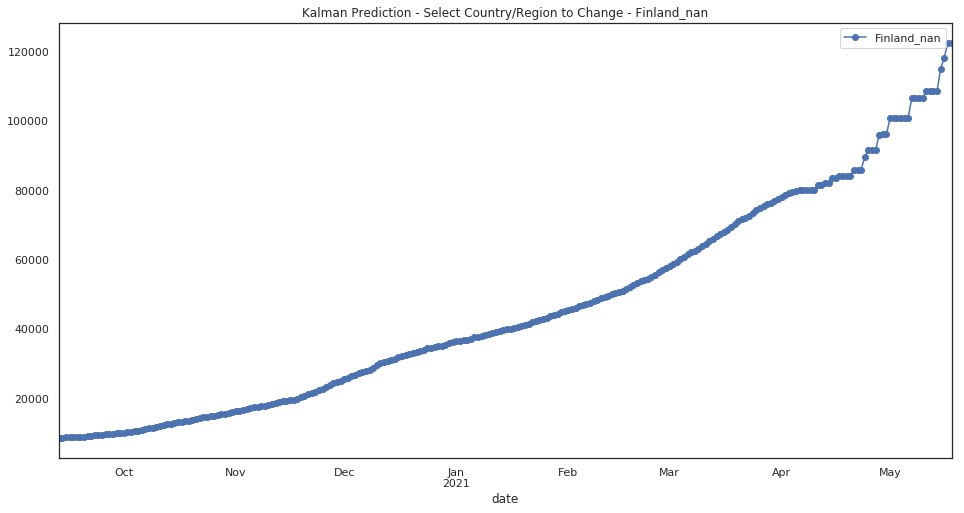

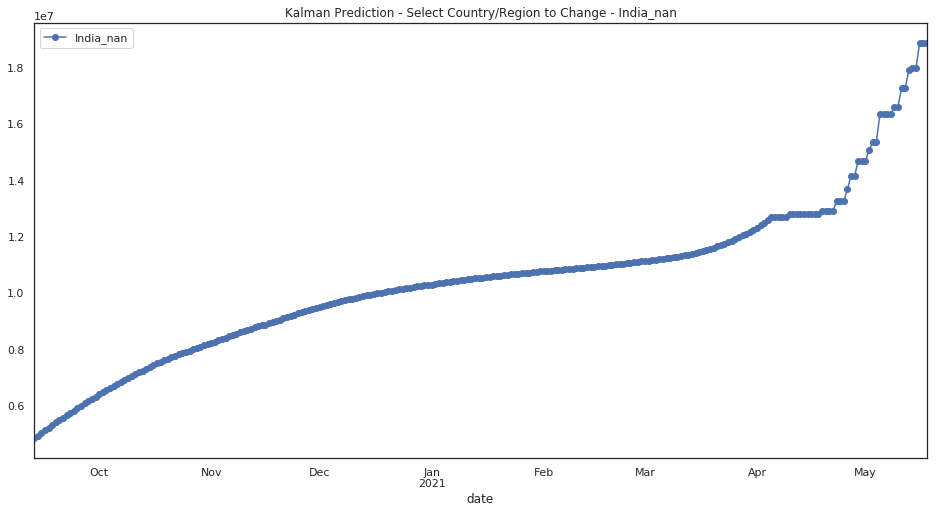

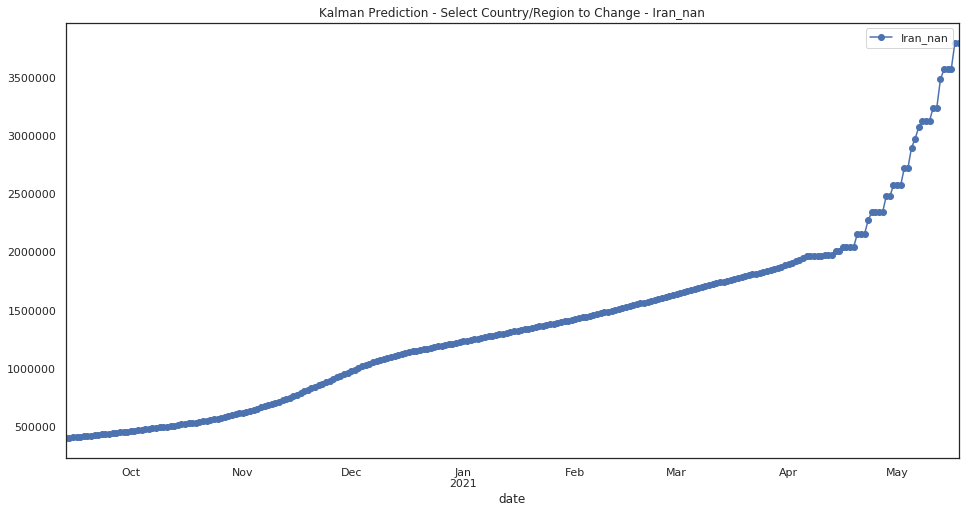

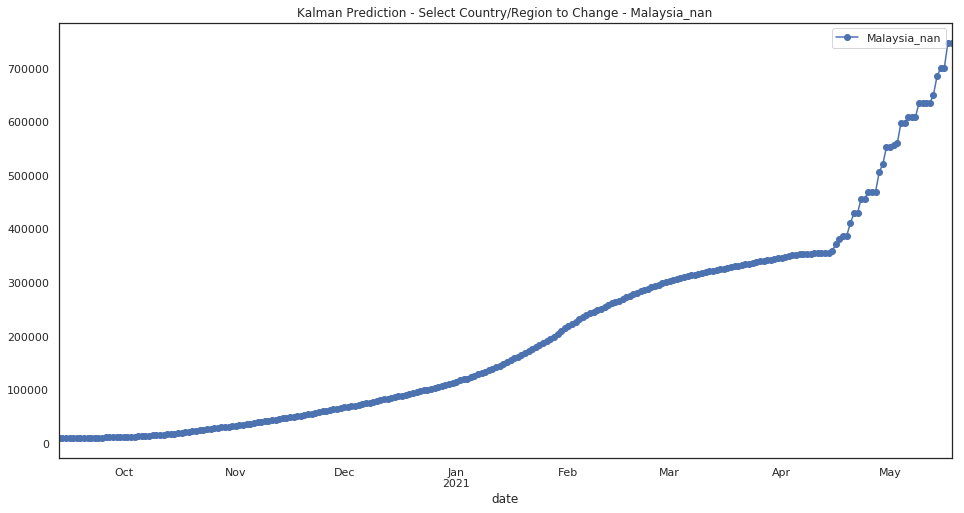

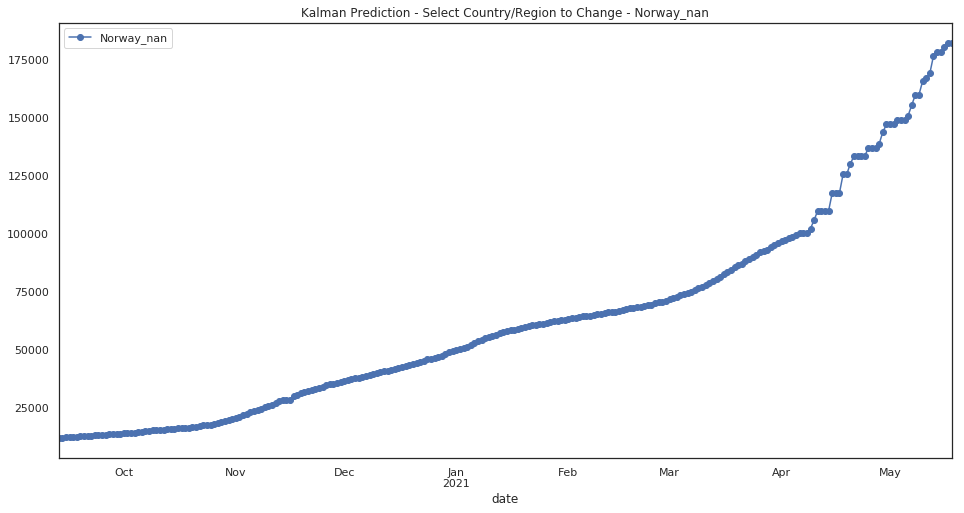

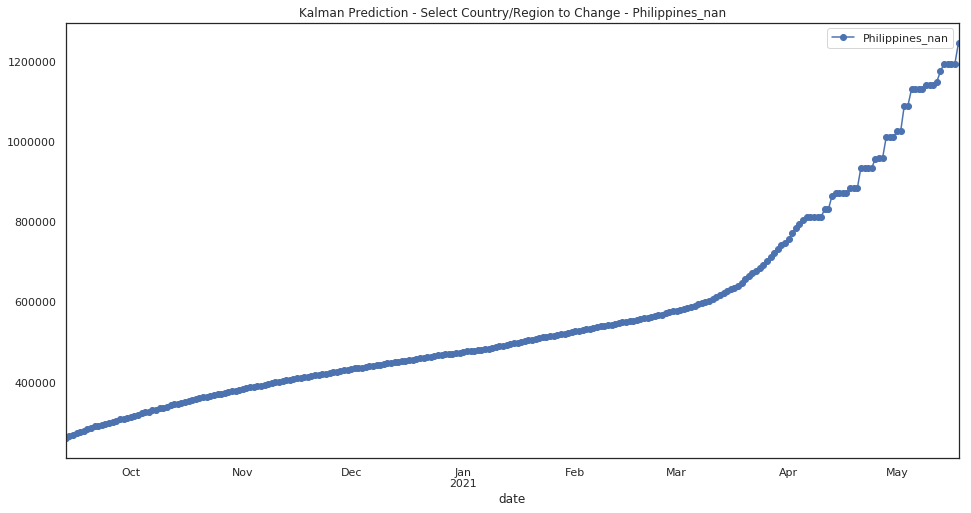

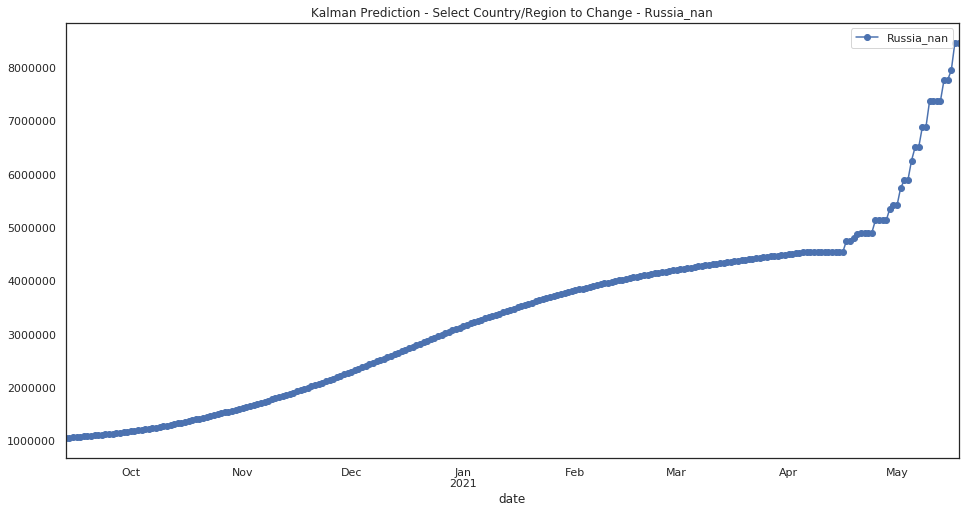

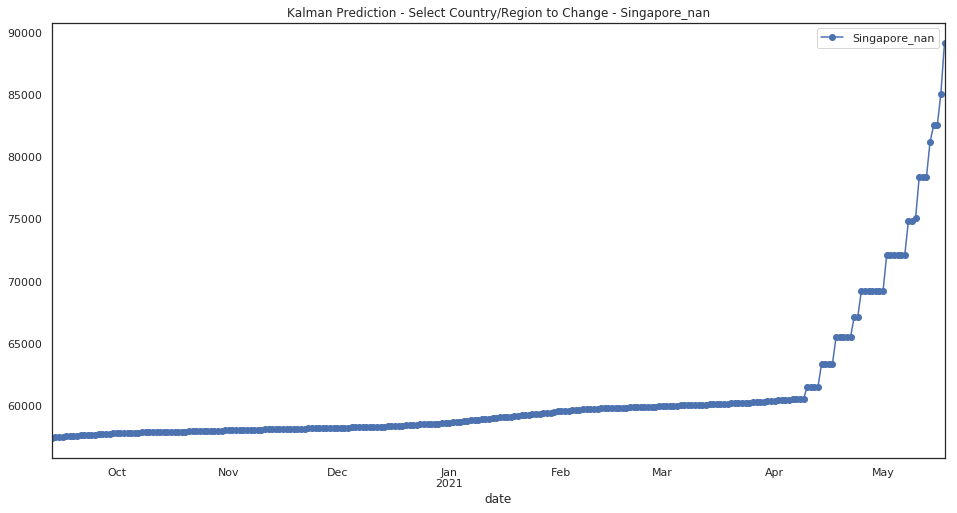

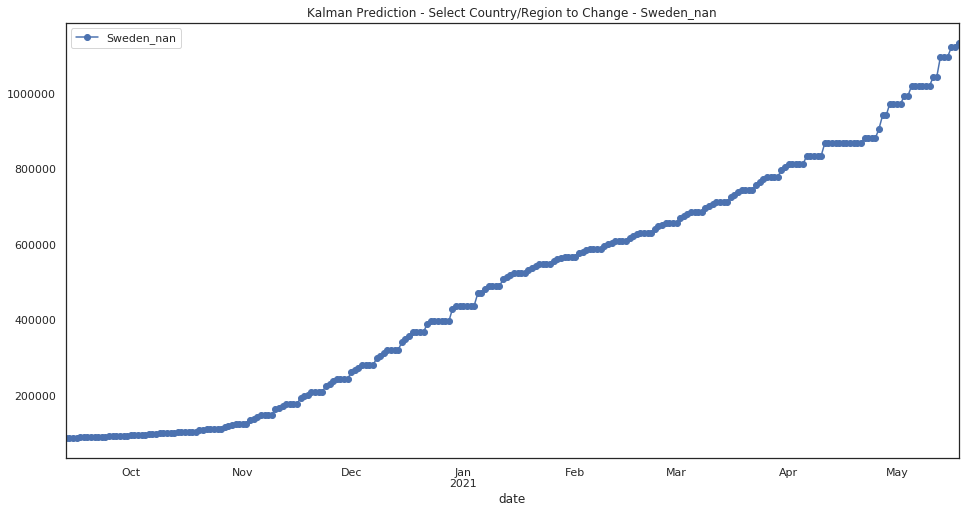

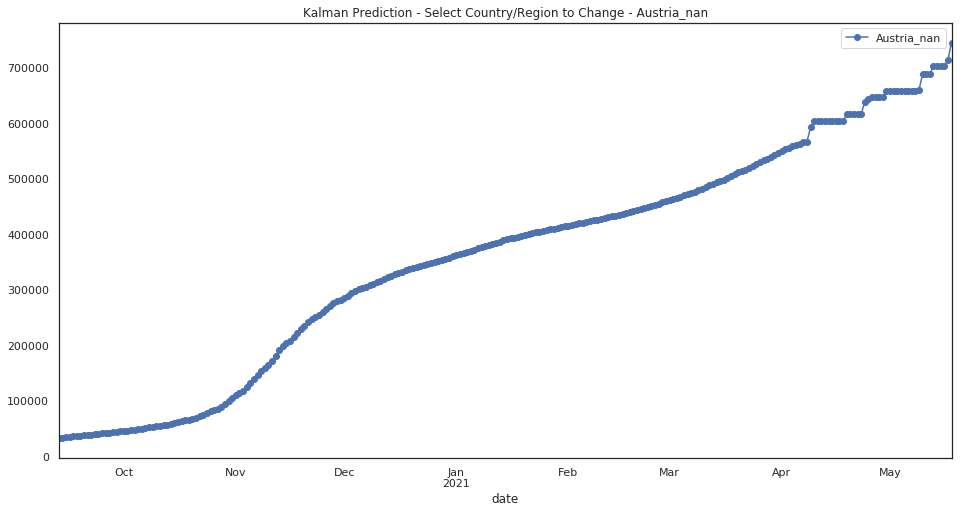

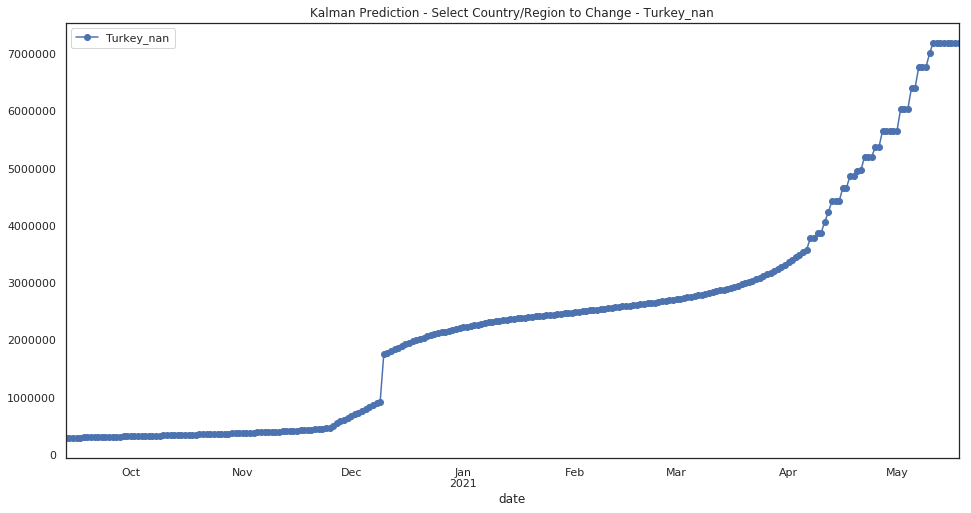

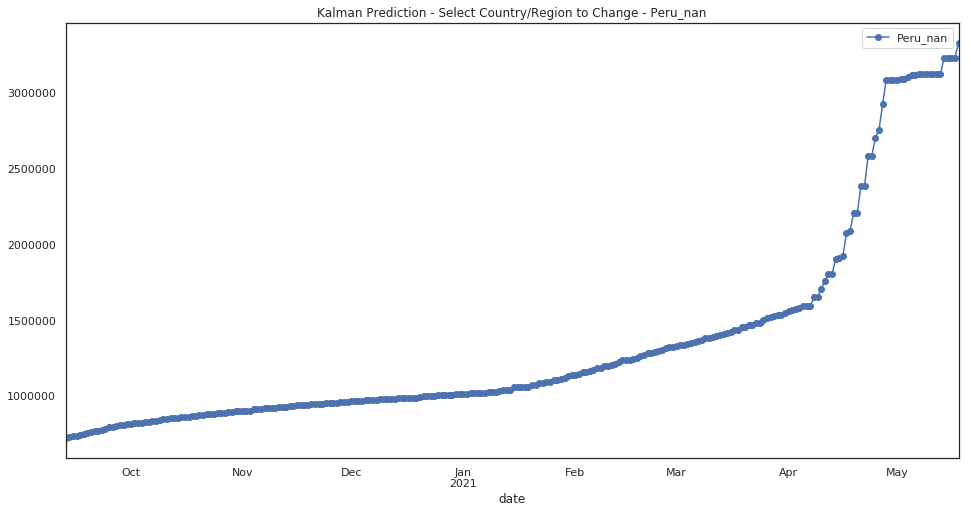

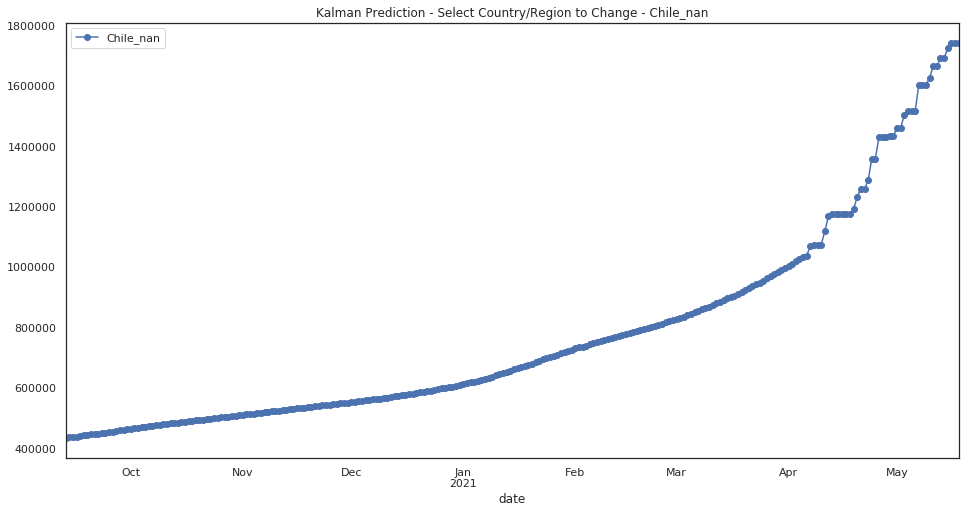

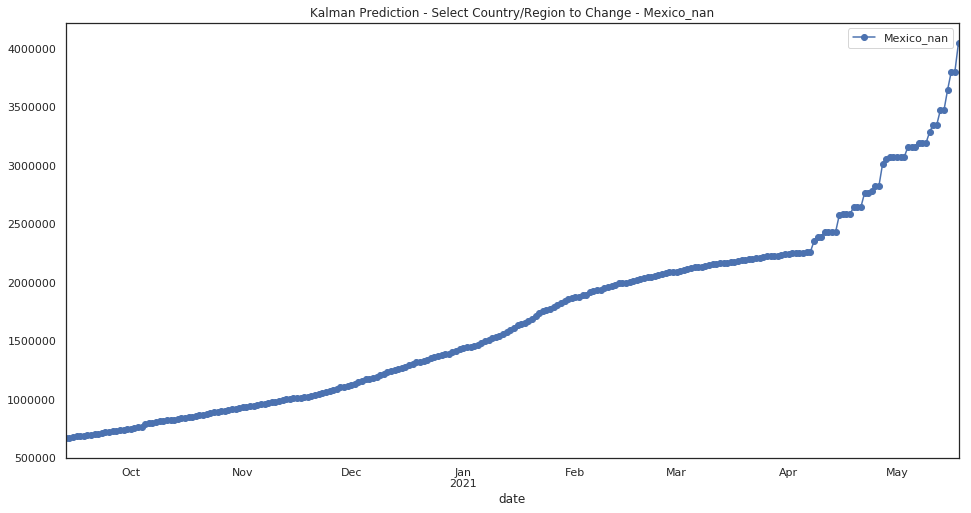

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-05-18 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      43411994.0
Brazil_nan                                          NaN      23521981.0
India_nan                                           NaN      18885259.0
France_nan                                          NaN      10638961.0
Russia_nan                                          NaN       8468370.0
United Kingdom_nan                                  NaN       7549985.0
Turkey_nan                                          NaN       7193830.0
Spain_nan                                           NaN       5692965.0
Italy_nan                                           NaN       5670226.0
Poland_nan                                          NaN       5196587.0
Argentina_nan                                       NaN       4402394.0
Germany_nan                                         NaN       4064057.0
Mexico_nan                                          NaN       4047891.0
Iran_nan                                            NaN       3801582.0
Colombia_nan                                        NaN       3382873.0
Ukraine_nan                                         NaN       3360424.0
Peru_nan                                            NaN       3331561.0
Indonesia_nan                                       NaN       3052190.0
Netherlands_nan                                     NaN       2980597.0
Czechia_nan                                         NaN       2752632.0
South Africa_nan                                    NaN       2294101.0
Romania_nan                                         NaN       1981602.0
Chile_nan                                           NaN       1742645.0
Belgium_nan                                         NaN       1462820.0
Portugal_nan                                        NaN       1297987.0
Iraq_nan                                            NaN       1296671.0
Hungary_nan                                         NaN       1255429.0
Philippines_nan                                     NaN       1246294.0
Jordan_nan                                          NaN       1179513.0
Serbia_nan                                          NaN       1144794.0
...                                                 ...             ...
Canada_Prince Edward Island                         NaN           227.0
Australia_Australian Capital Territory              NaN           211.0
China_Guizhou                                       NaN           209.0
France_New Caledonia                                NaN           190.0
Australia_Northern Territory                        NaN           183.0
Canada_Yukon                                        NaN           128.0
China_Ningxia                                       NaN           105.0
United Kingdom_Falkland Islands (Malvinas)          NaN           101.0
Laos_nan                                            NaN            99.0
Fiji_nan                                            NaN            93.0
China_Macau                                         NaN            80.0
Saint Kitts and Nevis_nan                           NaN            79.0
Canada_Northwest Territories                        NaN            69.0
Holy See_nan                                        NaN            56.0
Denmark_Greenland                                   NaN            44.0
United Kingdom_Anguilla                             NaN            44.0
United Kingdom_Montserrat                           NaN            37.0
France_Saint Pierre and Miquelon                    NaN            32.0
Solomon Islands_nan                                 NaN            30.0
China_Qinghai                                       NaN            26.0
Canada_Grand Princess                               NaN            25.0
Canada_Repatriated Travellers                       NaN            20.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          54772.0      31195.0      62990.0      22571.0   
2020-09-14          54820.0      31339.0      63198.0      22652.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39240.0      12525.0      50144.0       1954.0   
2020-09-22          39278.0      12680.0      50337.0       1681.0   
2020-09-23          39325.0      12827.0      50525.0       2066.0   
2020-09-24          39342.0      12967.0      50706.0       1753.0   
2020-09-25          39362.0      13072.0      50883.0       2088.0   
2020-09-26          39370.0      13196.0      51047.0       1836.0   
2020-09-27          39399.0      13323.0      51201.0       2100.0   
2020-09-28          39417.0      13451.0      51349.0       2212.0   
2020-09-29          39435.0      13548.0      51504.0       1966.0   
2020-09-30          39450.0      13689.0      51666.0       2338.0   
2020-10-01          39467.0      13843.0      51829.0       2050.0   
2020-10-02          39474.0      13974.0      51989.0       2343.0   
2020-10-03          39482.0      14132.0      52139.0       2110.0   
2020-10-04          39520.0      14294.0      52281.0       2314.0   
2020-10-05          39593.0      14441.0      52415.0       2539.0   
2020-10-06          39658.0      14601.0      52543.0       2370.0   
2020-10-07          39725.0      14748.0      52665.0       2931.0   
2020-10-08          39791.0      14914.0      52801.0       2568.0   
2020-10-09          39862.0      15079.0      52948.0       2998.0   
2020-10-10          39878.0      15249.0      53088.0       2696.0   
2020-10-11          39965.0      15421.0      53222.0       2953.0   
2020-10-12          40029.0      15589.0      53459.0       3210.0   
...                     ...          ...          ...          ...   
2021-04-20          66678.0     160501.0     143249.0      13502.0   
2021-04-21          68637.0     165802.0     148899.0      13502.0   
2021-04-22          72476.0     177435.0     156705.0      13502.0   
2021-04-23          73169.0     180672.0     155659.0      13502.0   
2021-04-24          74421.0     178397.0     154860.0      13502.0   
2021-04-25          75006.0     178397.0     162585.0      13502.0   
2021-04-26          74614.0     184340.0     172794.0      13729.0   
2021-04-27          74614.0     188140.0     173213.0      13972.0   
2021-04-28          76138.0     186624.0     171997.0      13972.0   
2021-04-29          78548.0     196347.0     172937.0      13972.0   
2021-04-30          79010.0     202286.0     172937.0      13972.0   
2021-05-01          78826.0     198852.0     173310.0      14031.0   
2021-05-02          78842.0     207196.0     173310.0      14124.0   
2021-05-03          82757.0     211597.0     176690.0      14176.0   
2021-05-04          84273.0     212828.0     179152.0      14176.0   
2021-05-05          87150.0     222976.0     177682.0      14176.0   
2021-05-06          92162.0     225046.0     182280.0      14176.0   
2021-05-07          95763.0     224428.0     184502.0      14176.0   
2021-05-08          96311.0     225589.0     183810.0      14176.0   
2021-05-09          95537.0     230040.0     193601.0      14176.0   
2021-05-10         100082.0     241088.0     199374.0      14176.0   
2021-05-11         102322.0     242670.0     196761.0      14200.0   
2021-05-12         101514.0     244776.0     196485.0      14779.0   
2021-05-13         108555.0     247834.0     196485.0      14779.0   
2021-05-14

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'France_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Turkey_nan',
 'Spain_nan',
 'Italy_nan',
 'Poland_nan',
 'Argentina_nan',
 'Germany_nan',
 'Mexico_nan',
 'Iran_nan',
 'Colombia_nan',
 'Ukraine_nan',
 'Peru_nan',
 'Indonesia_nan',
 'Netherlands_nan',
 'Czechia_nan',
 'South Africa_nan',
 'Romania_nan',
 'Chile_nan',
 'Belgium_nan',
 'Portugal_nan',
 'Iraq_nan',
 'Hungary_nan',
 'Philippines_nan',
 'Jordan_nan',
 'Serbia_nan',
 'Sweden_nan',
 'Morocco_nan',
 'Switzerland_nan',
 'Israel_nan',
 'Pakistan_nan',
 'Bangladesh_nan',
 'United Arab Emirates_nan',
 'Malaysia_nan',
 'Austria_nan',
 'Japan_nan',
 'Lebanon_nan',
 'Bulgaria_nan',
 'Canada_Ontario',
 'Ecuador_nan',
 'Saudi Arabia_nan',
 'Georgia_nan',
 'Greece_nan',
 'West Bank and Gaza_nan',
 'Azerbaijan_nan',
 'Ireland_nan',
 'Canada_Quebec',
 'Slovakia_nan',
 'Panama_nan',
 'Moldova_nan',
 'Kazakhstan_nan',
 'Croatia_nan',
 'Nepal_nan',
 'Bolivia_nan',
 'Tunisia_nan',
 'Nige

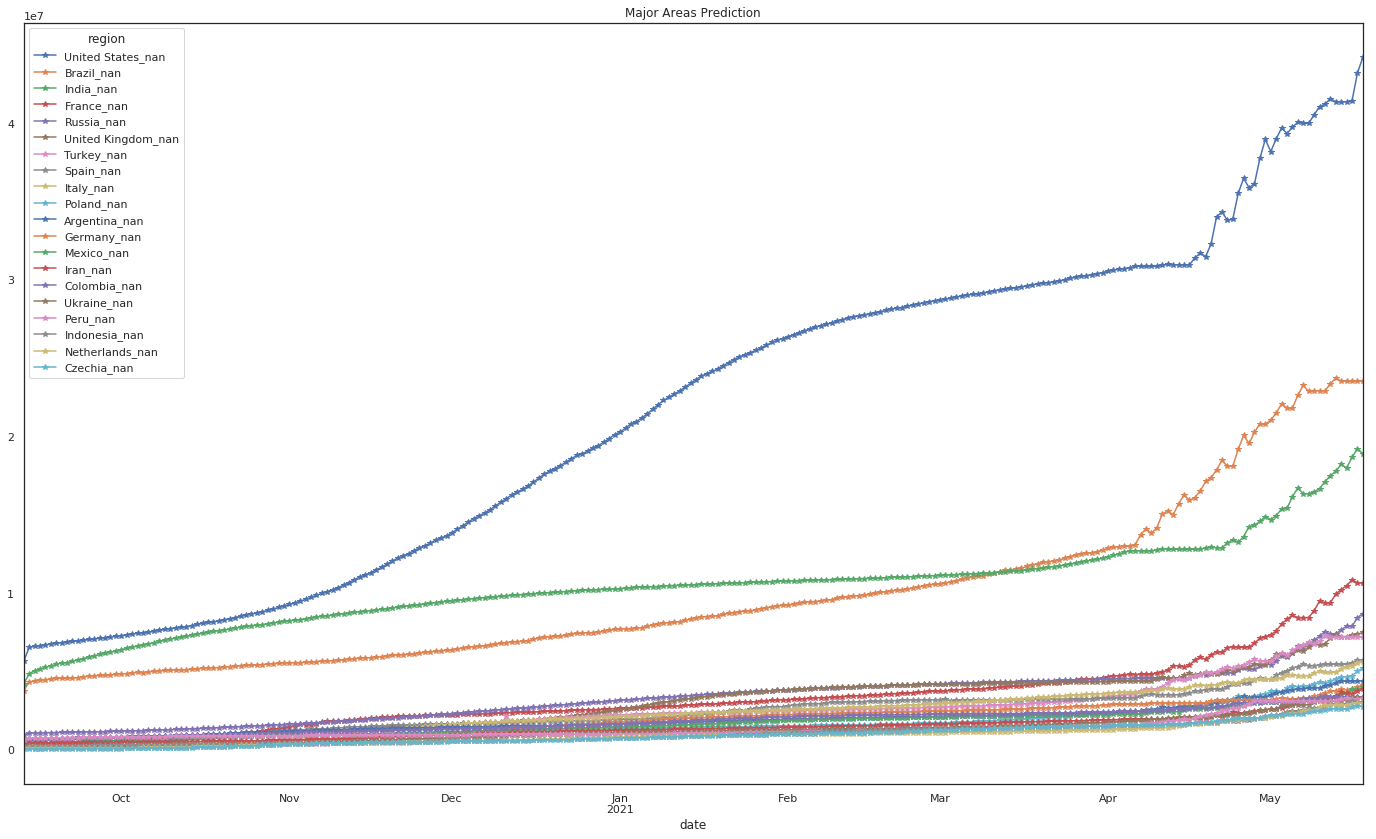

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

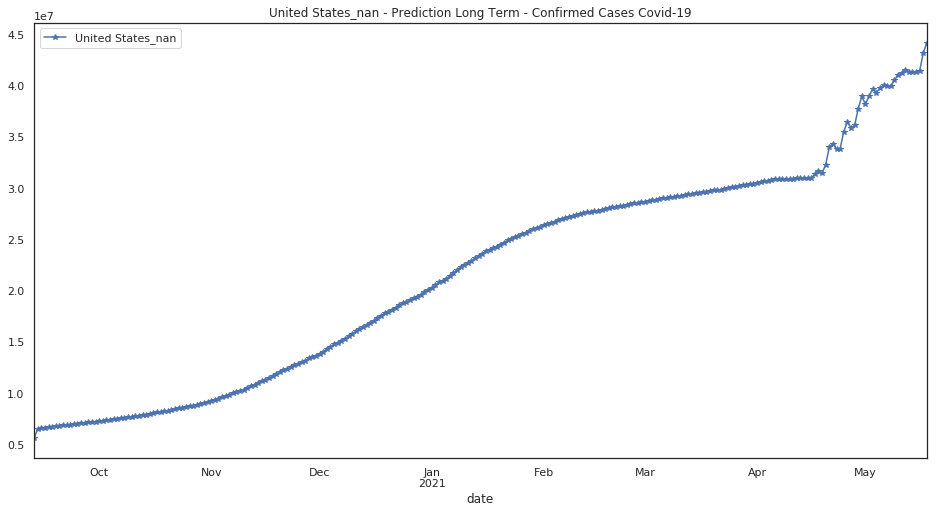

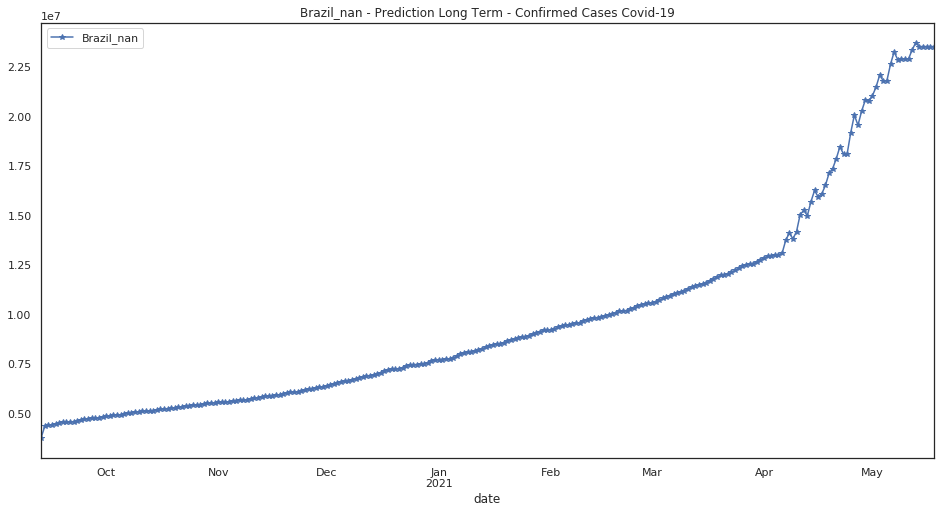

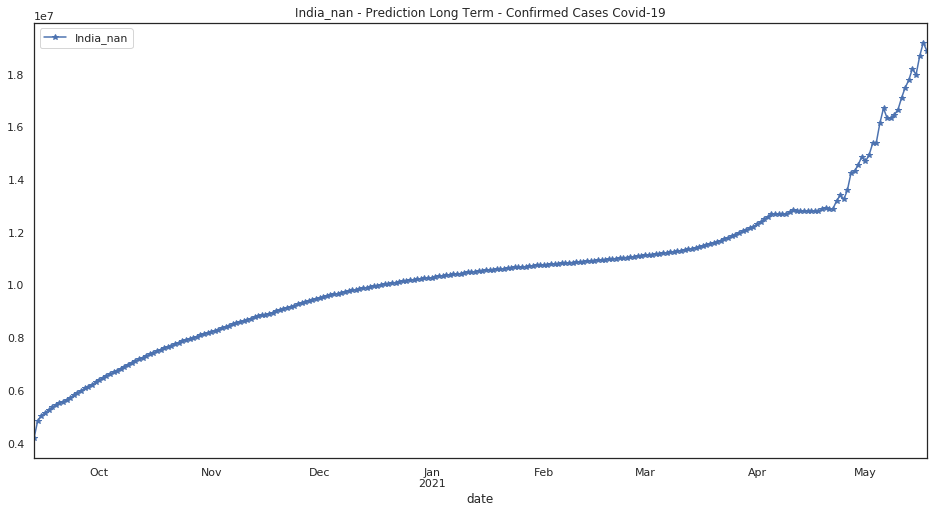

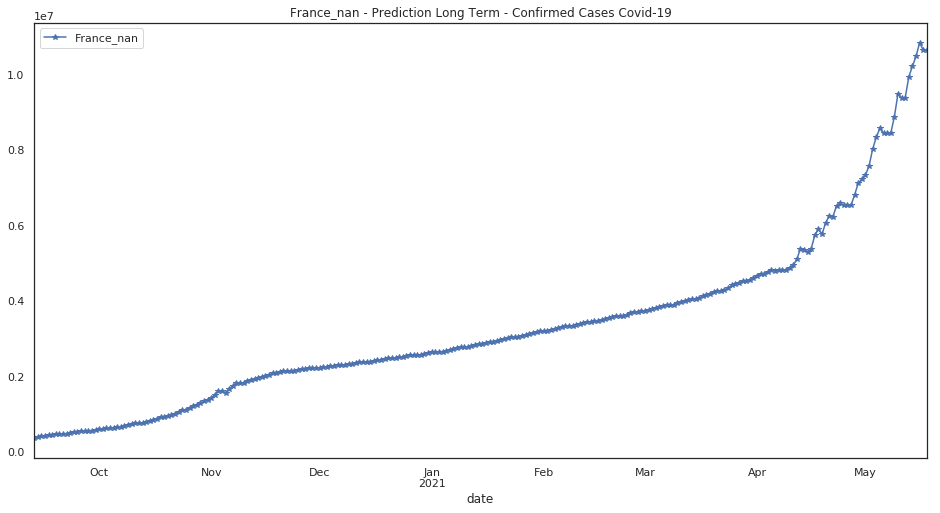

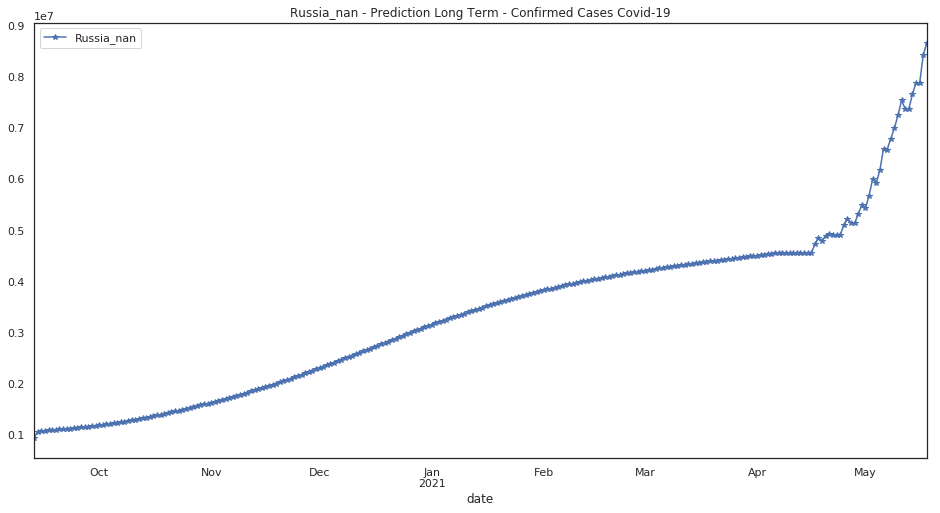

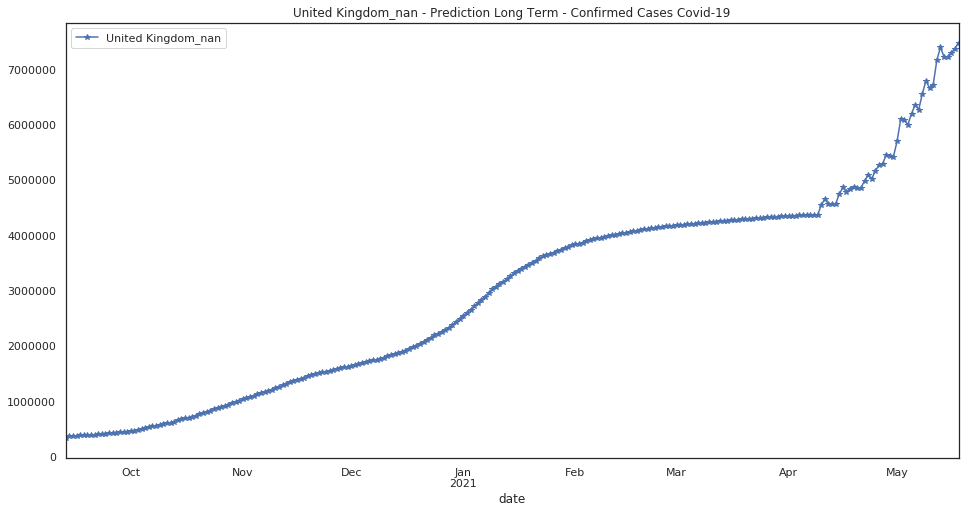

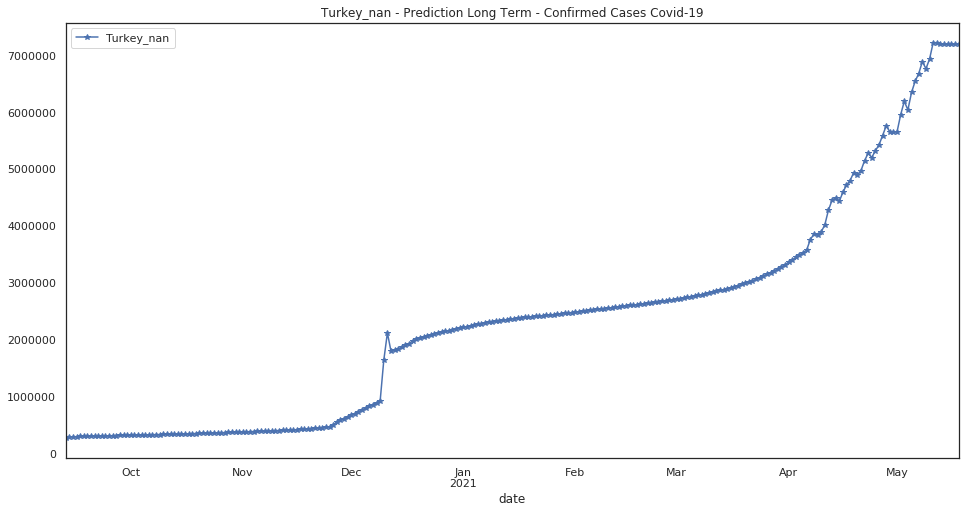

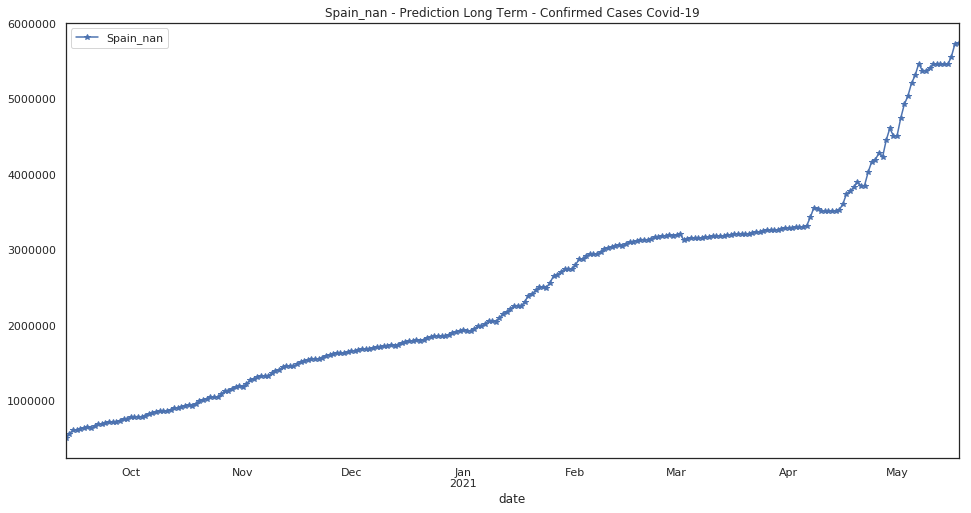

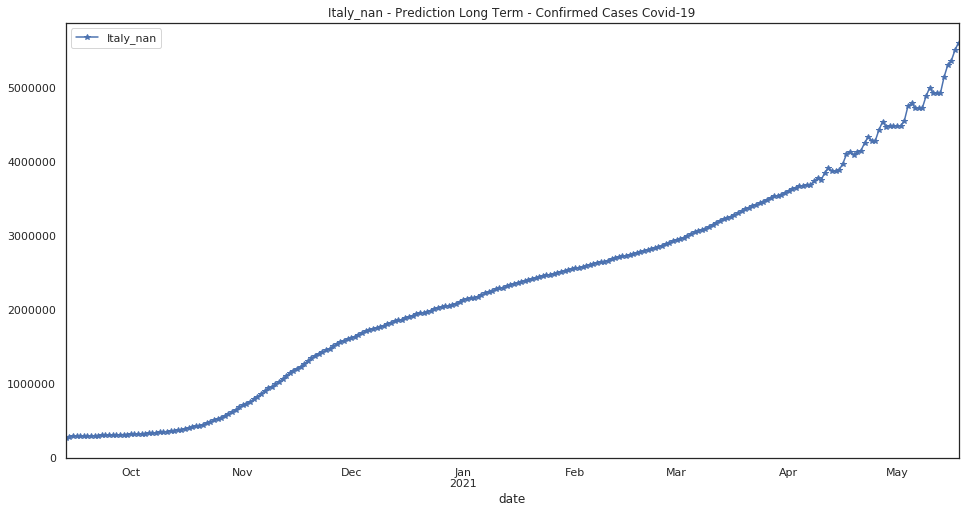

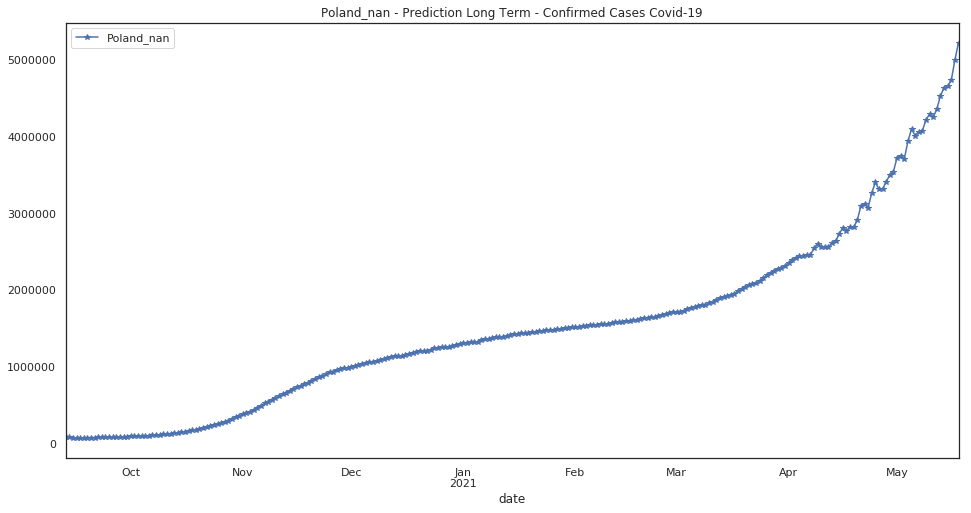

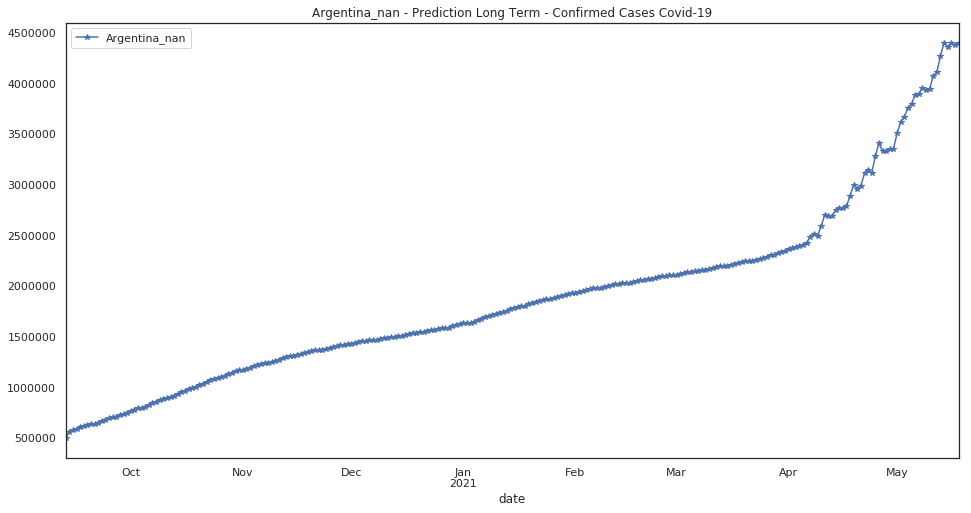

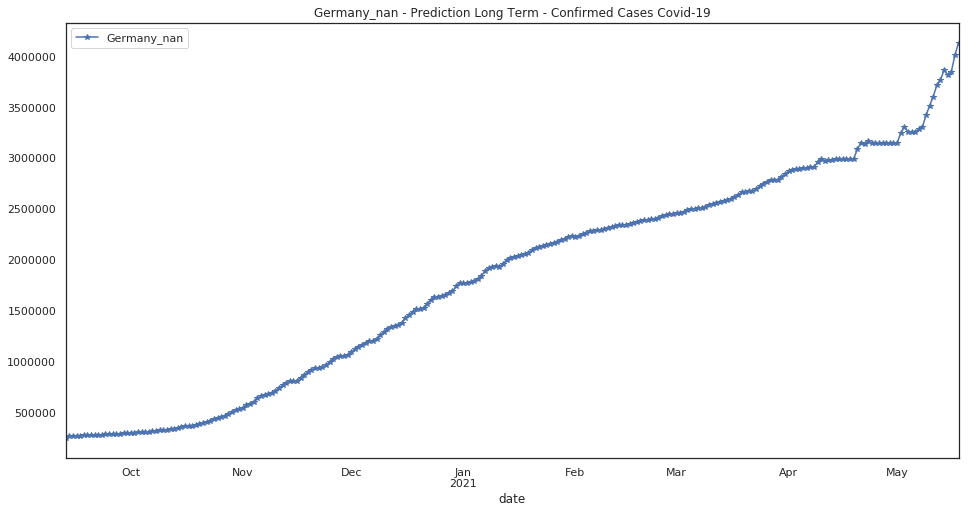

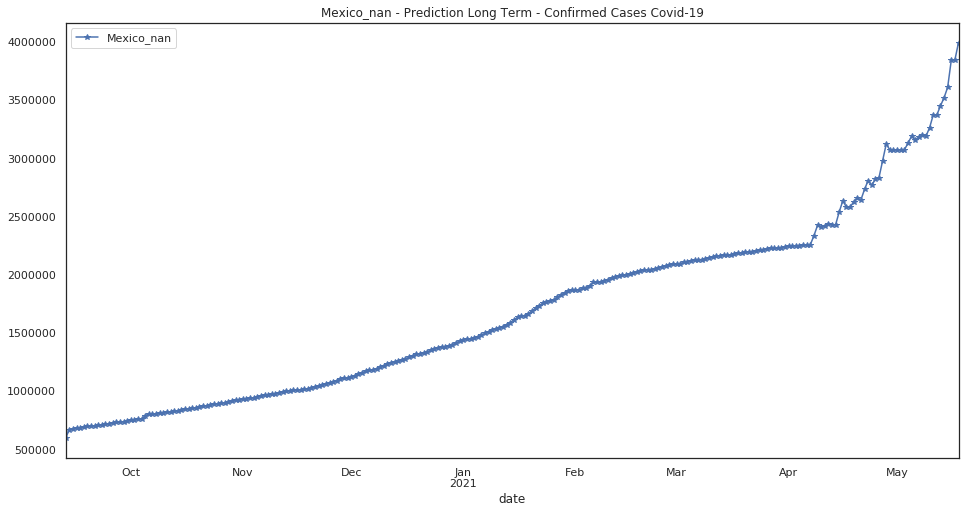

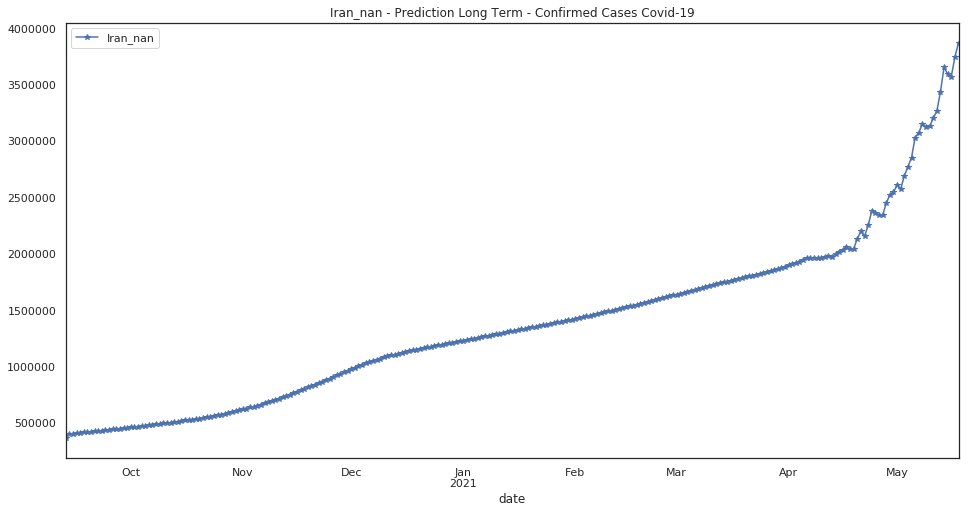

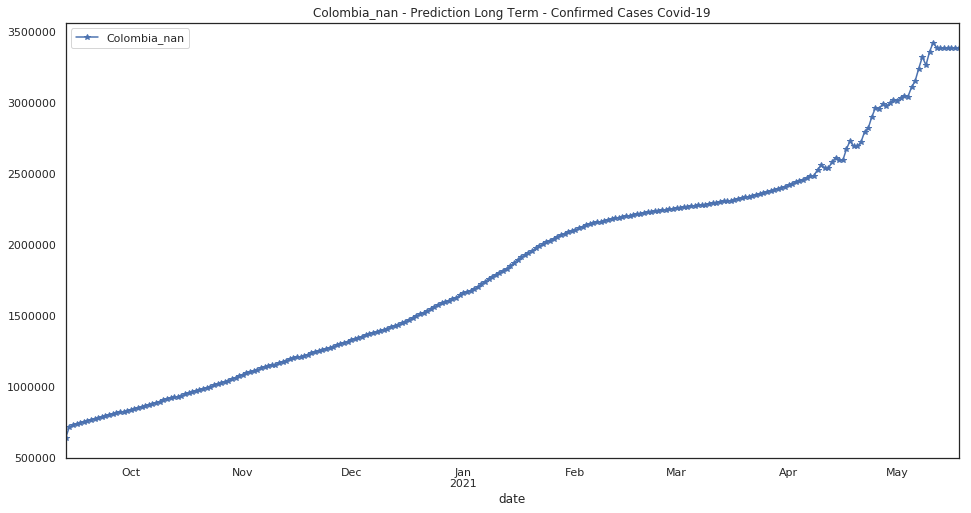

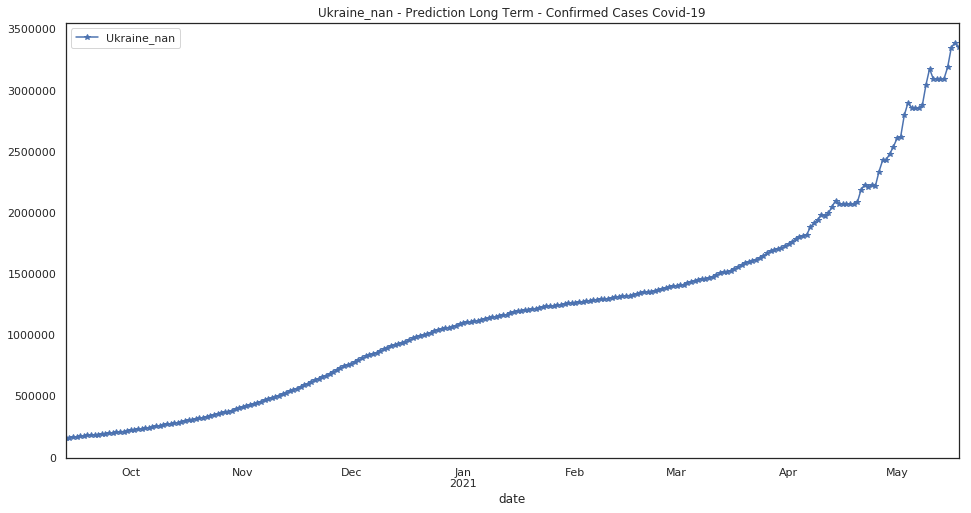

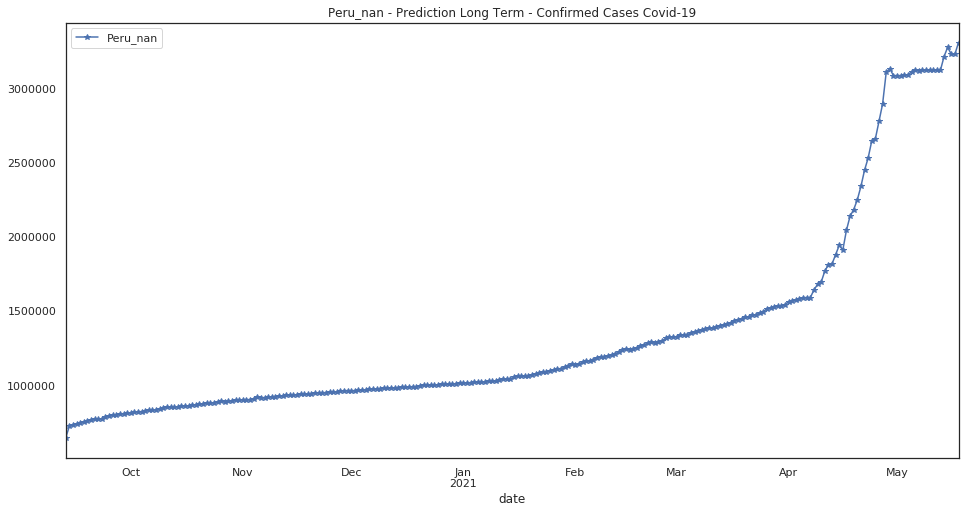

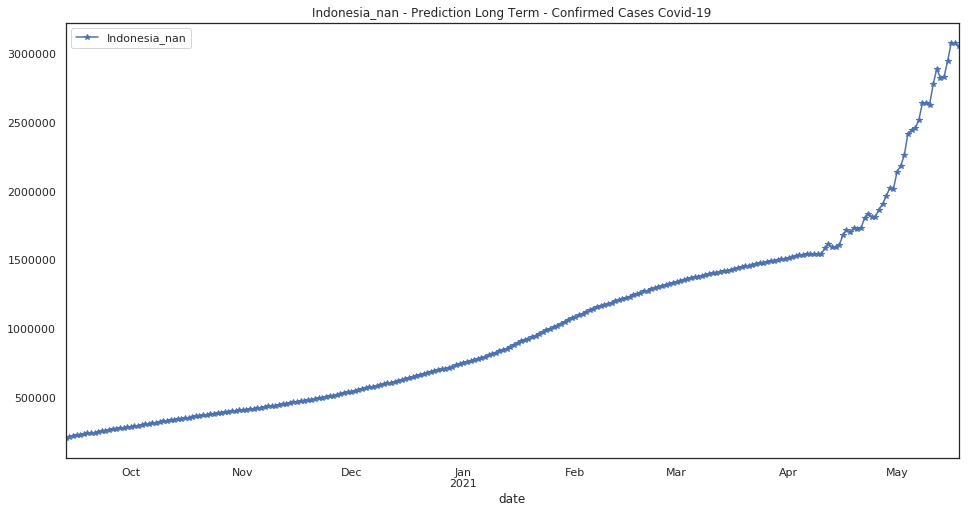

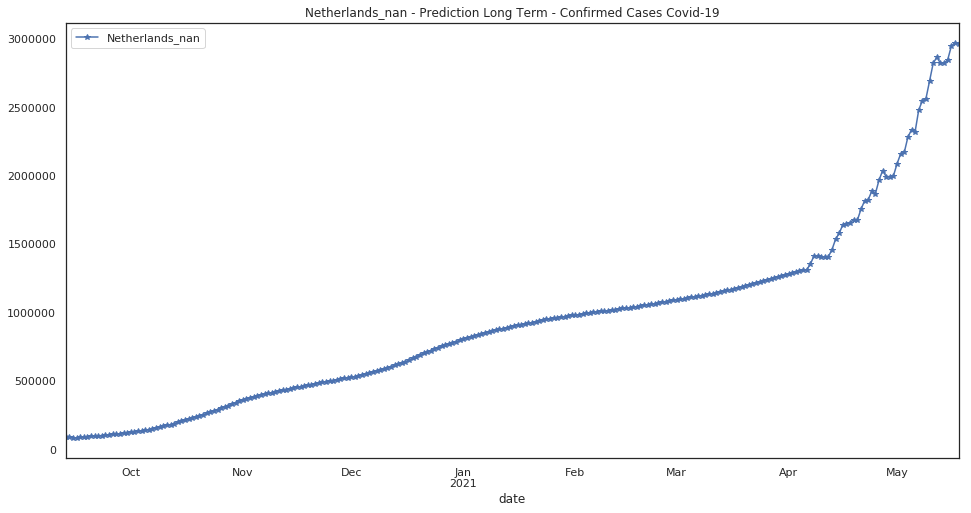

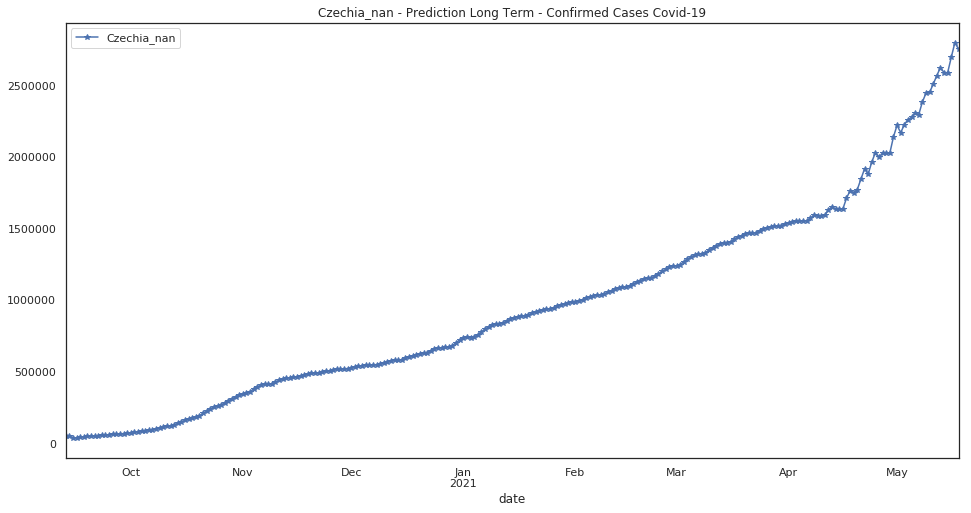

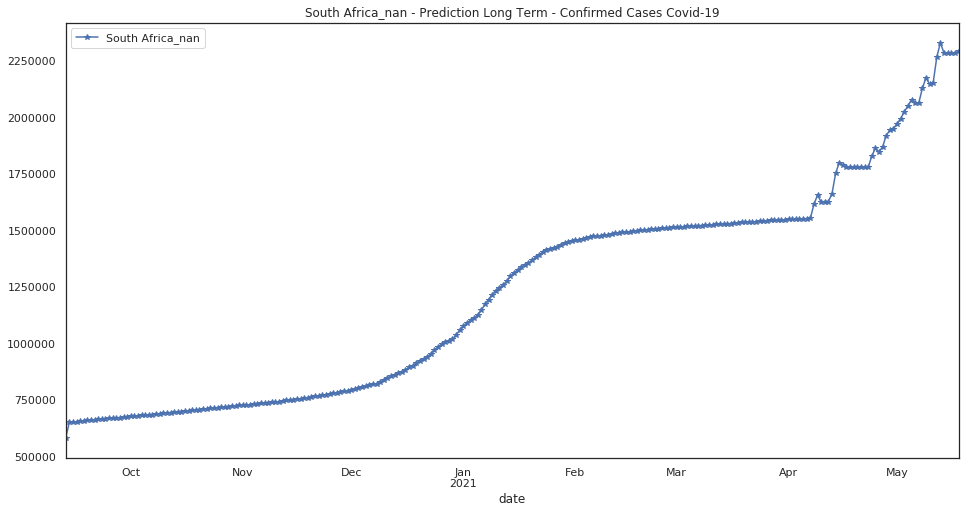

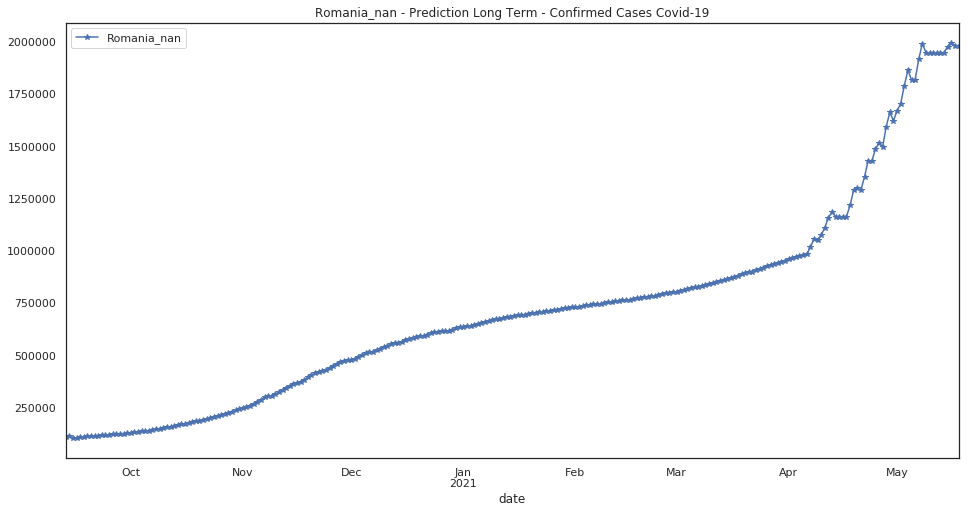

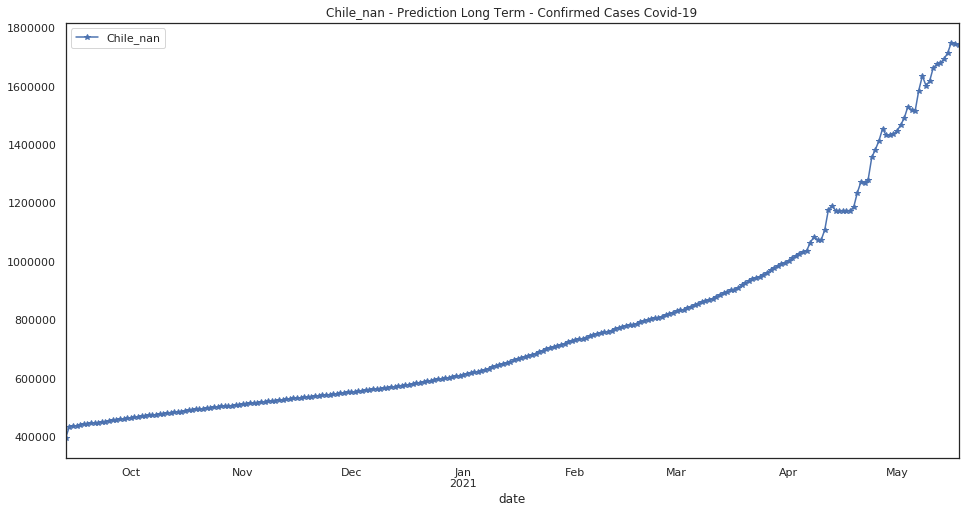

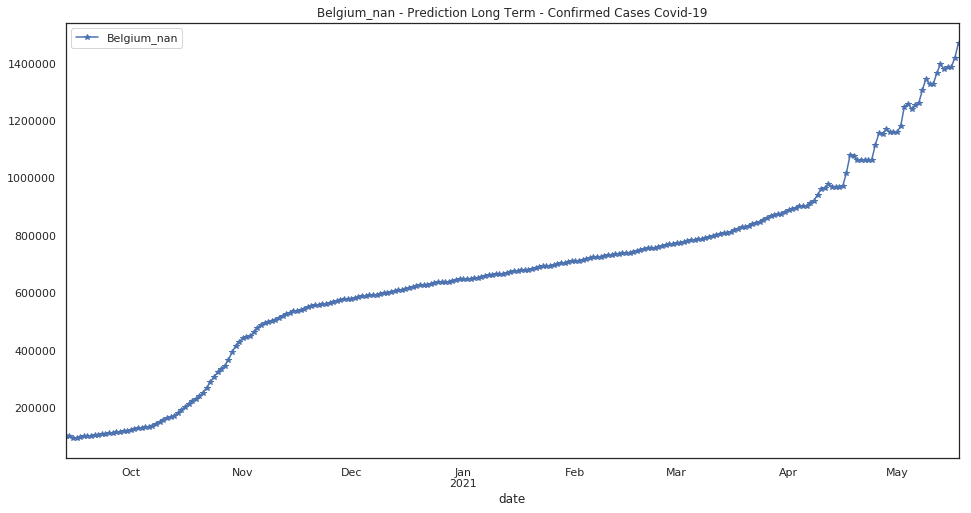

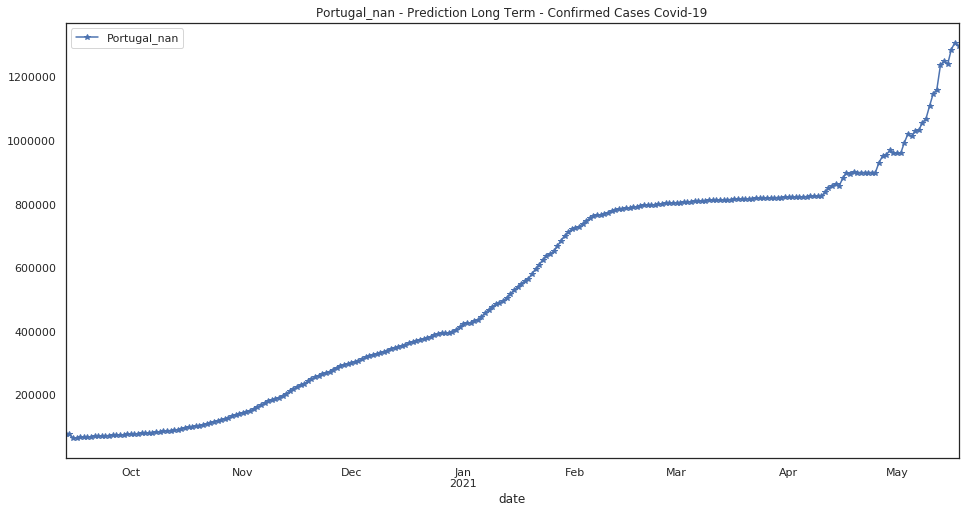

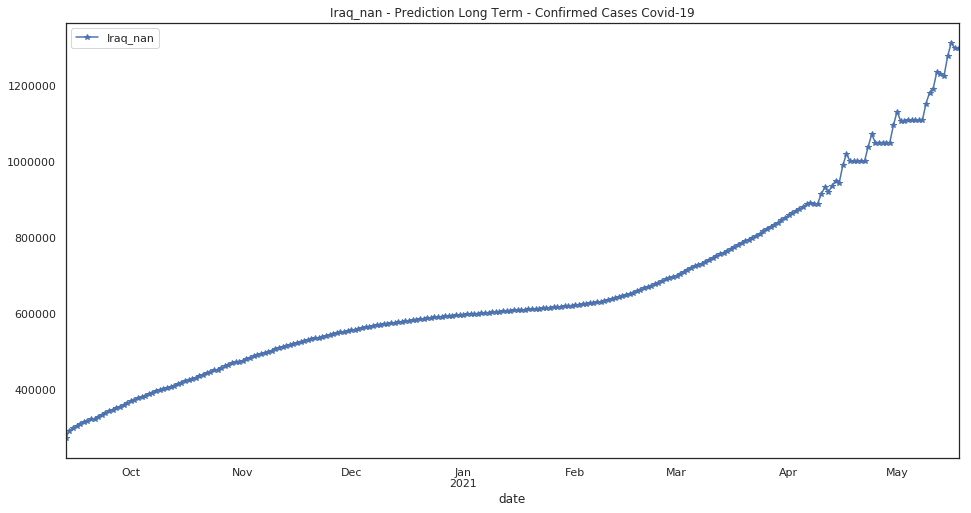

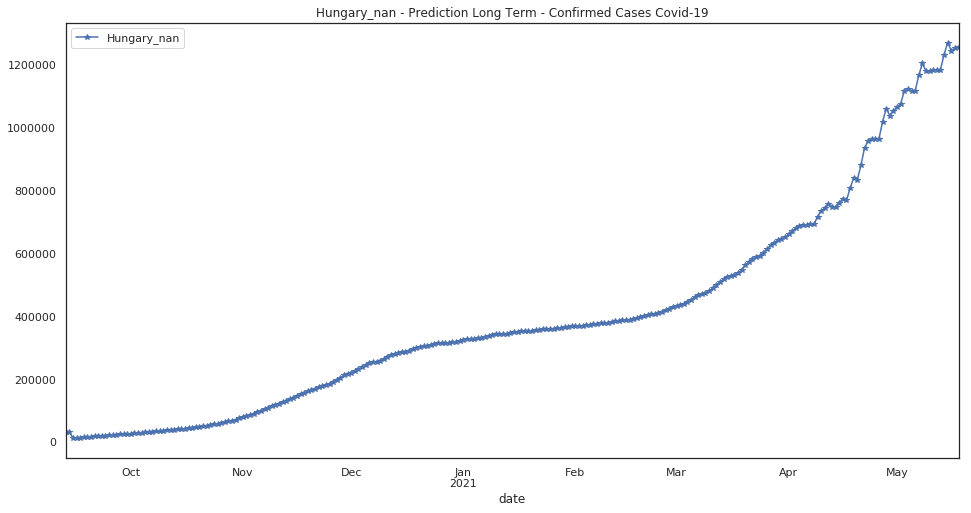

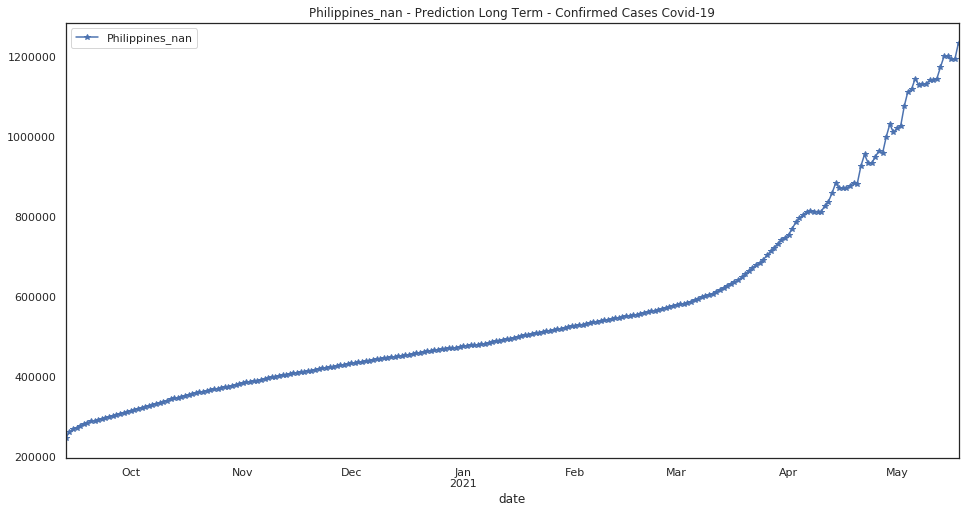

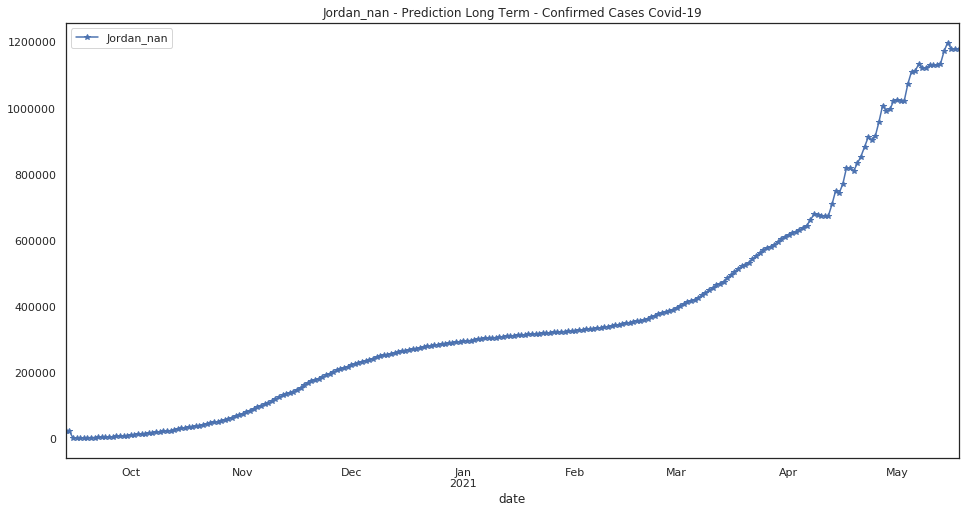

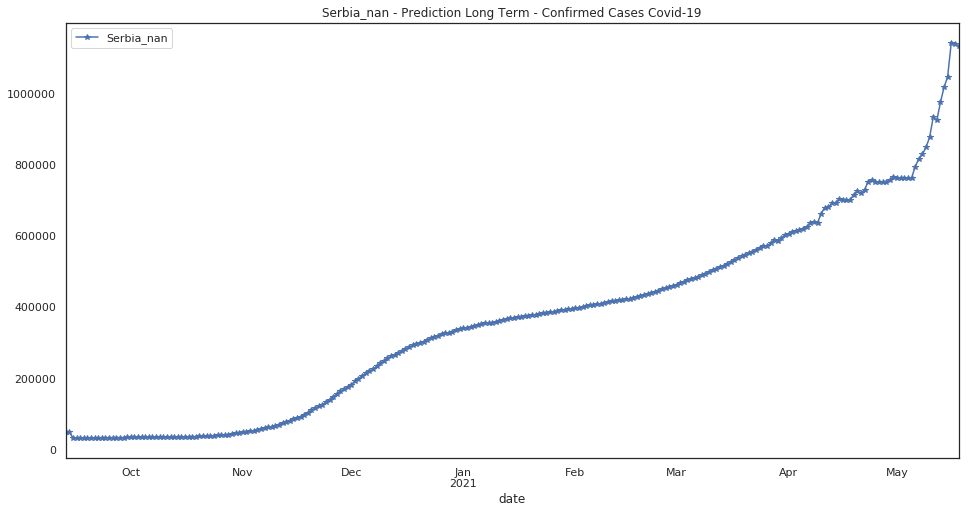

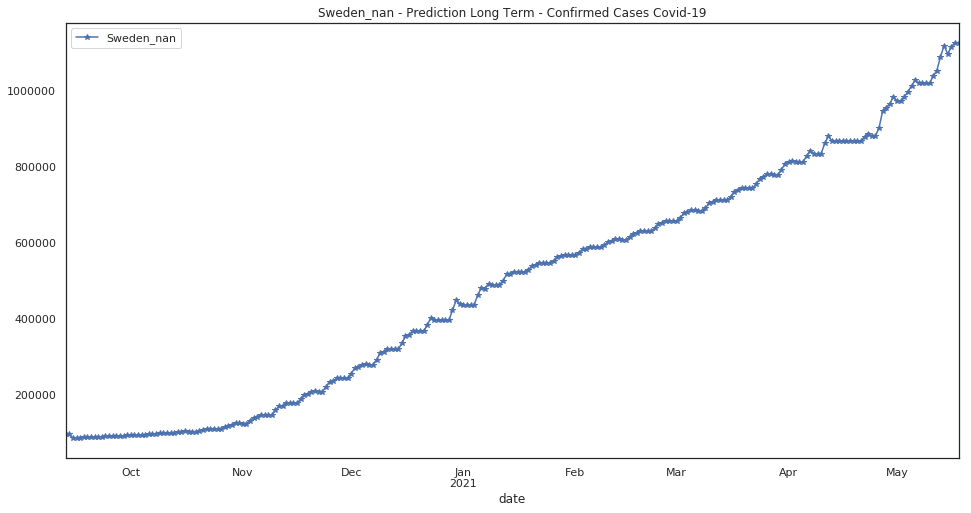

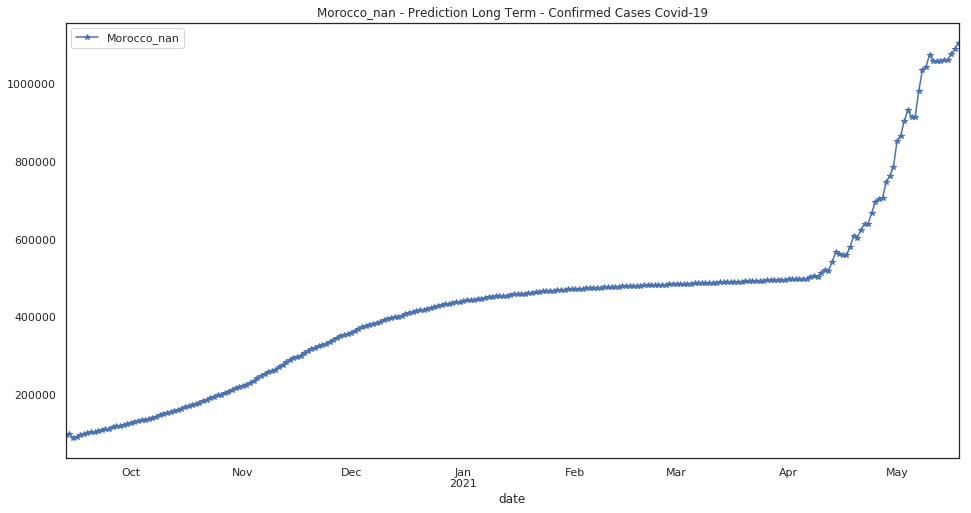

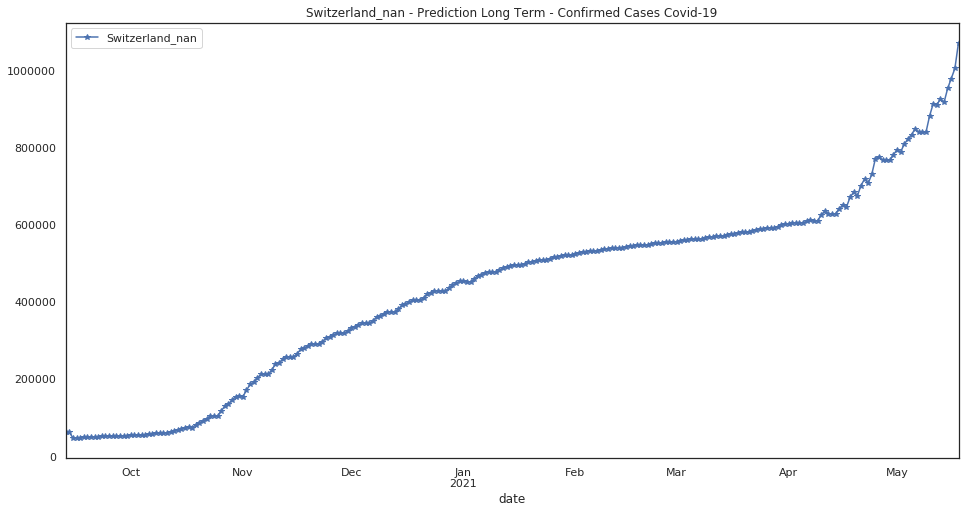

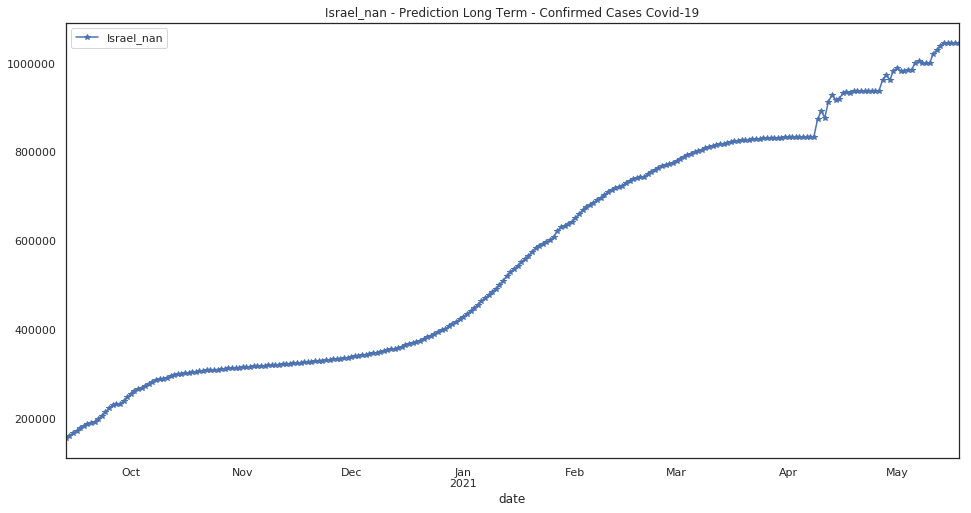

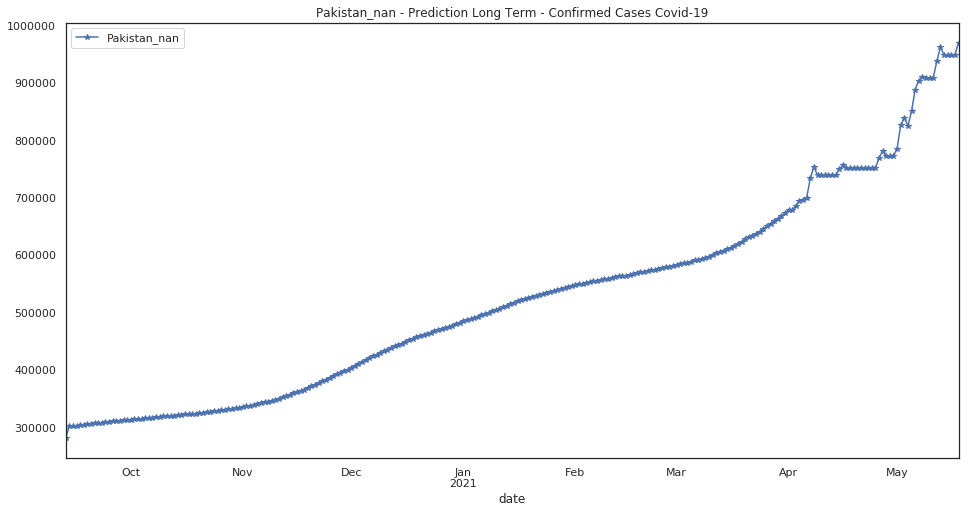

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

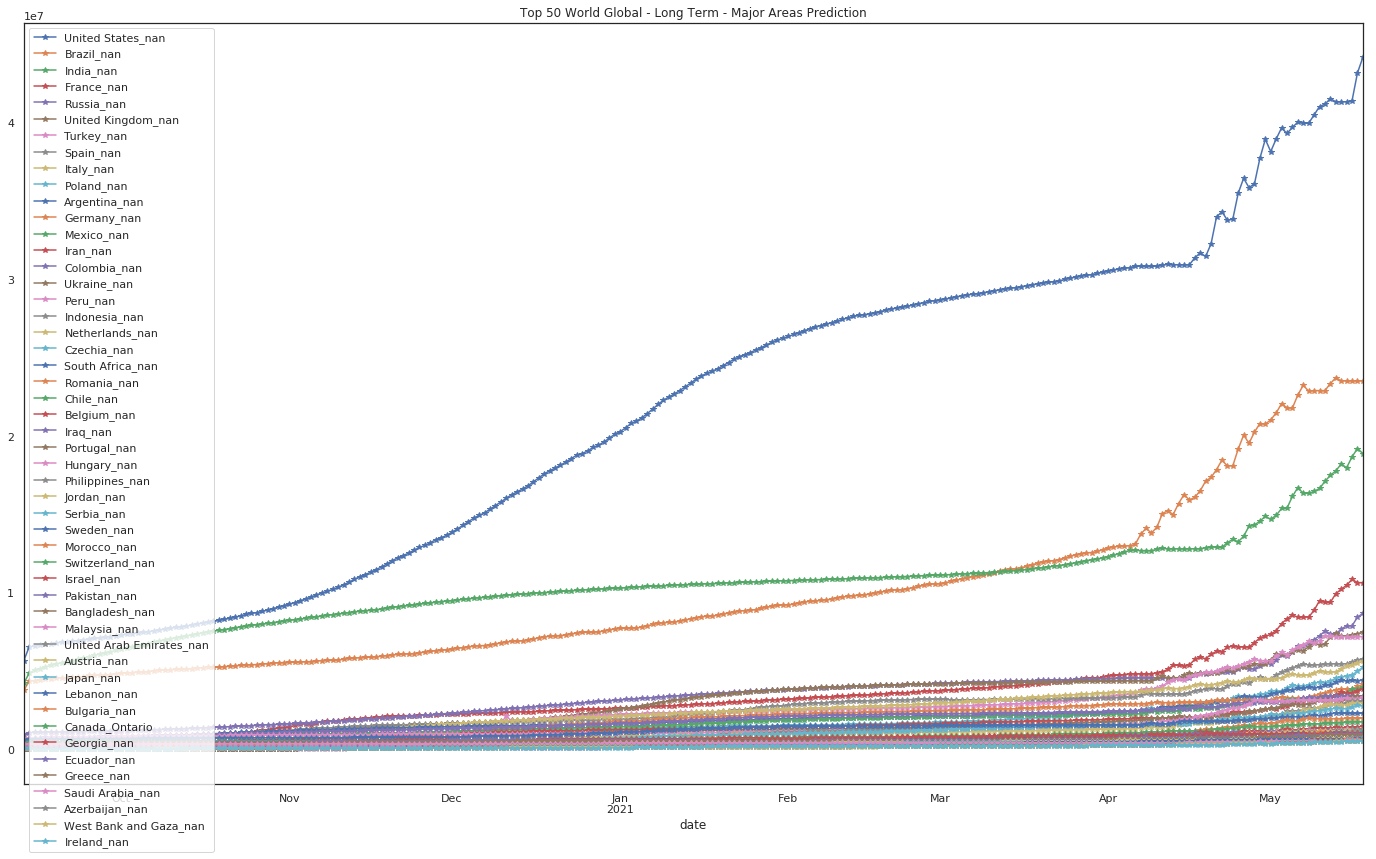

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

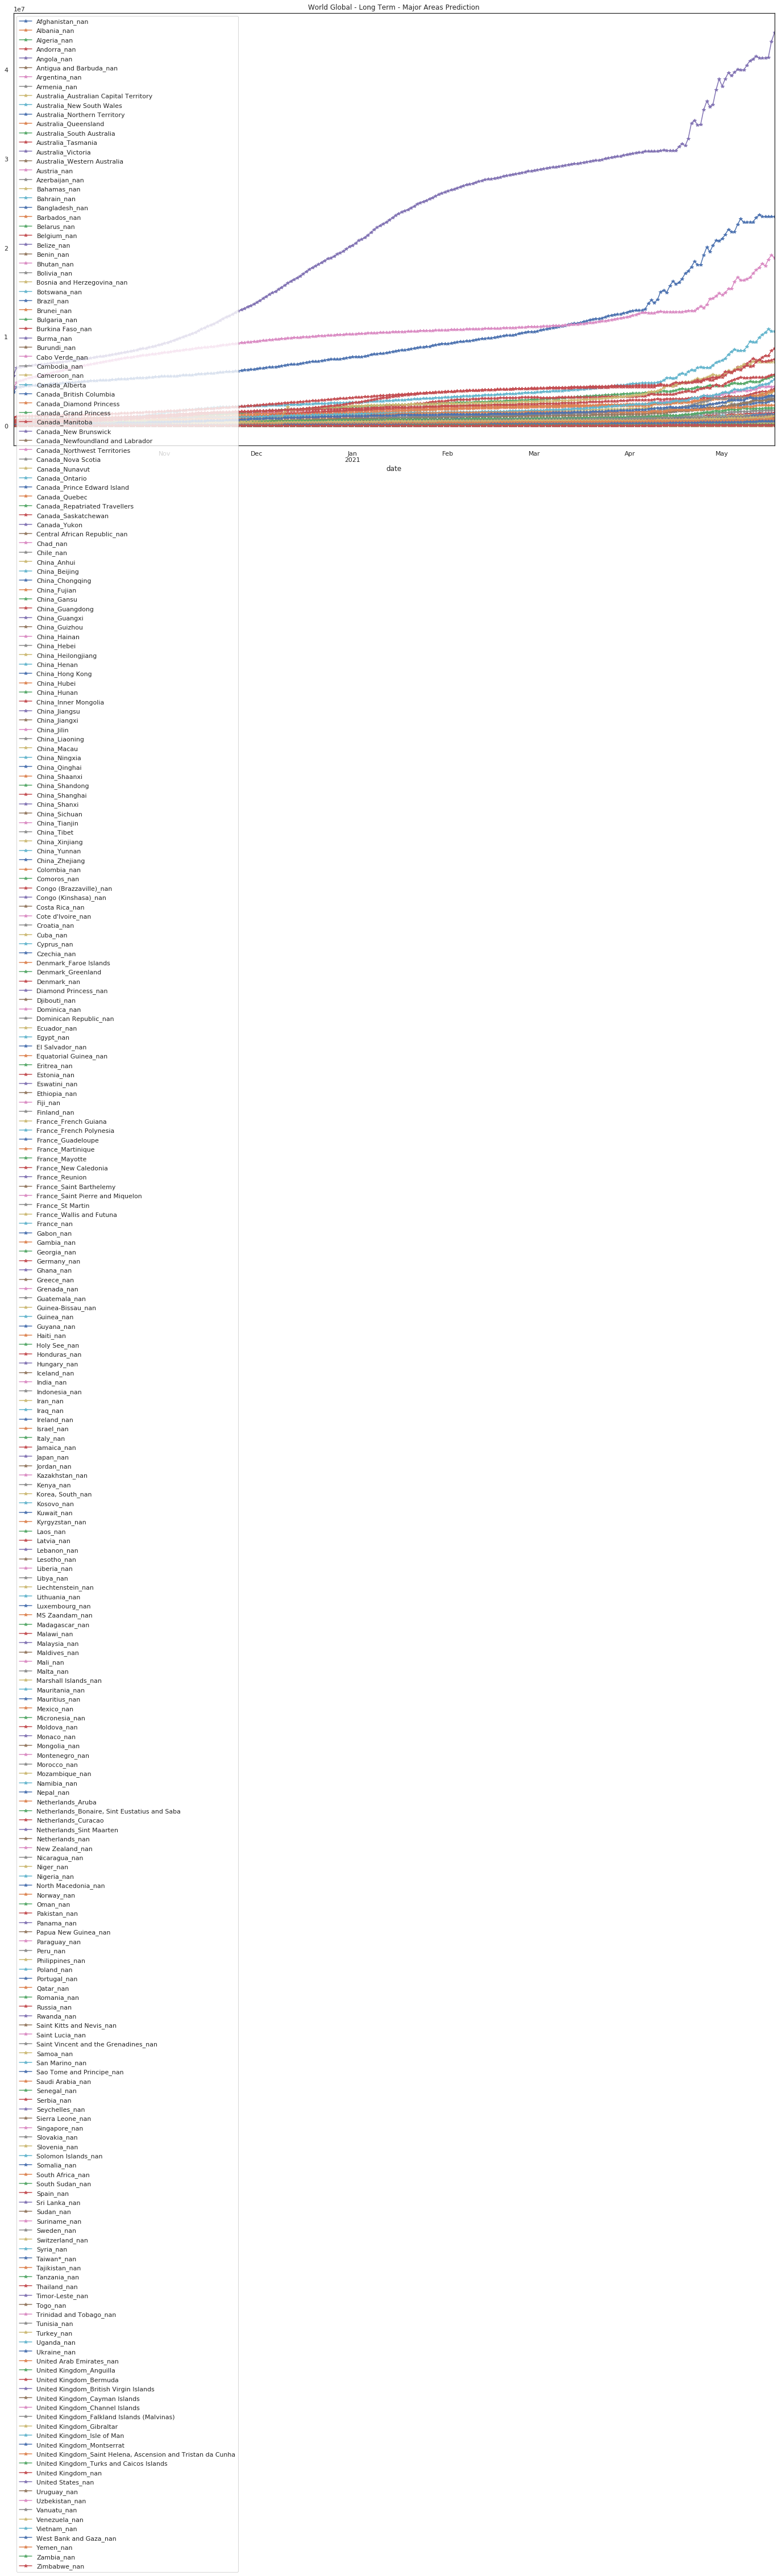

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41295.0      19999.0      57138.0       4410.0   
2020-10-29          41421.0      20263.0      57448.0       4517.0   
2020-10-30          41495.0      20603.0      57766.0       4567.0   
2020-10-31          41586.0      20831.0      58062.0       4665.0   
2020-11-01          41659.0      21194.0      58380.0       4756.0   
2020-11-02          41780.0      21467.0      58687.0       4825.0   
2020-11-03          41879.0      21845.0      59073.0       4888.0   
2020-11-04          41970.0      22220.0      59611.0       4976.0   
2020-11-05          42089.0      22638.0      60255.0       5045.0   
2020-11-06          42137.0      23115.0      60903.0       5135.0   
2020-11-07          42196.0      23582.0      61491.0       5351.0   
2020-11-08          42310.0      24087.0      62131.0       5319.0   
2020-11-09          42438.0      24615.0      62768.0       5383.0   
2020-11-10          42608.0      25162.0      63486.0       5437.0   
2020-11-11          42760.0      25665.0      64294.0       5477.0   
2020-11-12          42941.0      26117.0      65142.0       5567.0   
2020-11-13          43114.0      26630.0      66017.0       5616.0   
2020-11-14          43190.0      27115.0      66863.0       5725.0   
2020-11-15          43376.0      27690.0      67708.0       5838.0   
2020-11-16          43588.0      28289.0      68604.0       5872.0   
2020-11-17          43802.0      28984.0      69589.0       5914.0   
2020-11-18          44052.0      29678.0      70634.0       5951.0   
2020-11-19          44300.0      30459.0      71666.0       6018.0   
2020-11-20          44494.0      31275.0      72757.0       6066.0   
2020-11-21          44641.0      32019.0      73795.0       6142.0   
2020-11-22          44825.0      32638.0      74852.0       6207.0   
2020-11-23          45089.0      33430.0      75873.0       6256.0   
2020-11-24          45289.0      34112.0      76965.0       6304.0   
2020-11-25          45507.0      34787.0      78028.0       6351.0   
2020-11-26          45724.0      35480.0      79086.0       6428.0   
...                     ...          ...          ...          ...   
2021-04-19          66587.0     160501.0     140775.0      13435.0   
2021-04-20          66678.0     160501.0     143249.0      13502.0   
2021-04-21          68637.0     165802.0     148899.0      13502.0   
2021-04-22          72476.0     177435.0     156705.0      13502.0   
2021-04-23          73169.0     180672.0     155659.0      13502.0   
2021-04-24          74421.0     178397.0     154860.0      13502.0   
2021-04-25          75006.0     178397.0     162585.0      13502.0   
2021-04-26          74614.0     184340.0     172794.0      13729.0   
2021-04-27          74614.0     188140.0     173213.0      13972.0   
2021-04-28          76138.0     186624.0     171997.0      13972.0   
2021-04-29          78548.0     196347.0     172937.0      13972.0   
2021-04-30          79010.0     202286.0     172937.0      13972.0   
2021-05-01          78826.0     198852.0     173310.0      14031.0   
2021-05-02          78842.0     207196.0     173310.0      14124.0   
2021-05-03          82757.0     211597.0     176690.0      14176.0   
2021-05-04          84273.0     212828.0     179152.0      14176.0   
2021-05-05          87150.0     222976.0     177682.0      14176.0   
2021-05-06          92162.0     225046.0     182280.0      14176.0   
2021-05-07          95763.0     224428.0     184502.0      14176.0   
2021-05-08          96311.0     225589.0     183810.0      14176.0   
2021-05-09          95537.0     230040.0     193601.0      14176.0   
2021-05-10         100082.0     241088.0     199374.0      14176.0   
2021-05-11         102322.0     242670.0     196761.0      14200.0   
2021-05-12         101514.0     244776.0     196485.0      14779.0   
2021-05-13

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
250                                    Timor-Leste_nan  -8.874217  125.727539   
251                                           Togo_nan   8.619500    0.824800   
252                            Trinidad and Tobago_nan  10.691800  -61.222500   
253                                        Tunisia_nan  33.886917    9.537499   
254                                         Turkey_nan  38.963700   35.243300   
255                                  United States_nan  40.000000 -100.000000   
256                                         Uganda_nan   1.373333   32.290275   
257                                        Ukraine_nan  48.379400   31.165600   
258                           United Arab Emirates_nan  23.424076   53.847818   
259                            United Kingdom_Anguilla  18.220600  -63.068600   
260                             United Kingdom_Bermuda  32.307800  -64.750500   
261              United Kingdom_British Virgin Islands  18.420700  -64.640000   
262                      United Kingdom_Cayman Islands  19.313300  -81.254600   
263                     United Kingdom_Channel Islands  49.372300   -2.364400   
264         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
265                           United Kingdom_Gibraltar  36.140800   -5.353600   
266                         United Kingdom_Isle of Man  54.236100   -4.548100   
267                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      17            Azerbaijan_nan  40.143100   47.576900   
3      20            Bangladesh_nan  23.685000   90.356300   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      32              Bulgaria_nan  42.733900   25.485800   
7      51            Canada_Ontario  51.253800  -85.323200   
8      59                 Chile_nan -35.675100  -71.543000   
9      93              Colombia_nan   4.570900  -74.297300   
10    102               Czechia_nan  49.817500   15.473000   
11    110               Ecuador_nan  -1.831200  -78.183400   
12    131                France_nan  46.227600    2.213700   
13    134               Georgia_nan  42.315400   43.356900   
14    135               Georgia_nan  42.315400   43.356900   
15    136               Germany_nan  51.165691   10.451526   
16    138                Greece_nan  39.074200   21.824300   
17    148               Hungary_nan  47.162500   19.503300   
18    150                 India_nan  20.593684   78.962880   
19    151             Indonesia_nan  -0.789300  113.921300   
20    152                  Iran_nan  32.427908   53.688046   
21    153                  Iraq_nan  33.223191   43.679291   
22    154               Ireland_nan  53.142400   -7.692100   
23    155                Israel_nan  31.046051   34.851612   
24    156                Israel_nan  31.046051   34.851612   
25    157                 Italy_nan  41.871940   12.567380   
26    159                 Japan_nan  36.204824  138.252924   
27    160                Jordan_nan  31.240000   36.510000   
28    169               Lebanon_nan  33.854700   35.862300   
29    170               Lebanon_nan  33.854700   35.862300   
30    180              Malaysia_nan   4.210484  101.975766   
31    187                Mexico_nan  23.634500 -102.552800   
32    193               Morocco_nan  31.791700   -7.092600   
33    201           Netherlands_nan  52.132600    5.291300   
34    209              Pakistan_nan  30.375300   69.345100   
35    213                  Peru_nan  -9.190000  -75.015200   
36    214           Philippines_nan  12.879721  121.774017   
37    215                Poland_nan  51.919400   19.145100   
38    216              Portugal_nan  39.399900   -8.224500   
39    218               Romania_nan  45.943200   24.966800   
40    219                Russia_nan  61.524010  105.318756   
41    227          Saudi Arabia_nan  23.885942   45.079162   
42    229                Serbia_nan  44.016500   21.005900   
43    237          South Africa_nan -30.559500   22.937500   
44    239                 Spain_nan  40.463667   -3.749220   
45    243                Sweden_nan  60.128161   18.643501   
46    244           Switzerland_nan  46.818200    8.227500   
47    254                Turkey_nan  38.963700   35.243300   
48    255         United States_nan  40.000000 -100.000000   
49    257               Ukraine_nan  48.379400   31.165600   
50    258  United Arab Emirates_nan  23.424076   53.847818   
51    270        United Kingdom_nan  55.378100   -3.436000   
52    276    West Bank and Gaza_nan  31.952200   35.233200   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              500076.0             555537.0             577720.0   
1               49984.0              50313.0              33541.0   
2               54437.0              54502.0              38403.0   
3              312228.0             337520.0             339385.0   
4              101936.0             102669.0              94306.0   
5             3752626.0            4330455.0            4381377.0   
6               36852.0              36975.0              18061.0   
7               61466.0              61828.0              46905.0   
8              396001.0           

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()